# Importing libraries 

In [3]:
import pandas as pd
import numpy as np

# Getting data from Github

In [4]:
url="https://raw.githubusercontent.com/AJAYVISWA22/Uber-Fare-Prediction/main/Data/uber.csv"
df=pd.read_csv(url)
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


# Exploring the data 

In [5]:
df1=df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df1['Unnamed: 0'].nunique()

200000

In [7]:
df1['key'].nunique()

200000

In [8]:
df1["pickup_datetime"].nunique()

196629

In [9]:
df1['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208])

208 value is wrong .It repeats only once 


## Extracting the features

In [10]:
df1['pickup_datetime'][0]

'2015-05-07 19:52:06 UTC'

In [11]:
# Extracting features from "Pickup_datetime"

df1['pickup_datetime']=pd.to_datetime(df1['pickup_datetime'])
df1['date']=df1['pickup_datetime'].dt.date
df1['year']=df1['pickup_datetime'].dt.year
df1['month']=df1['pickup_datetime'].dt.month
df1['day']=df1['pickup_datetime'].dt.day
df1['day_name']=df1['pickup_datetime'].dt.day_name()
df1['week_of_year'] = df1['pickup_datetime'].dt.isocalendar().week
df1['time']=df1['pickup_datetime'].dt.time
df1['hour']=df1['pickup_datetime'].dt.hour
df1['minutes']=df1['pickup_datetime'].dt.minute




In [12]:
# Define a function to segment time of day
def segment_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

# Apply the function to create a new column for time of day
df1['time_of_day'] = df1['hour'].apply(segment_time_of_day)

In [13]:
def segment_passenger_count(count):
    if count <= 2:
        return 'mini'
    elif 3 <= count <= 4:
        return 'xuv'
    else:
        return 'premium xuv'

# Apply the function to create a new column for vehicle type
df1['vehicle_type'] = df1['passenger_count'].apply(segment_passenger_count)

In [14]:
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in kilometers (mean radius)
    r = 6371.0
    return c * r

# Calculate the distance and add it as a new column
df1['distance_km'] = df1.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'],
                                                   row['dropoff_longitude'], row['dropoff_latitude']), axis=1)






In [15]:
df1['distance_km']=df1['distance_km'].round(3)

In [16]:
df1

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,...,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,...,5,7,Thursday,19,19:52:06,19,52,evening,mini,1.683
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,...,7,17,Friday,29,20:04:56,20,4,evening,mini,2.458
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,...,8,24,Monday,35,21:45:00,21,45,night,mini,5.036
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,...,6,26,Friday,26,08:22:21,8,22,morning,xuv,1.662
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,...,8,28,Thursday,35,17:47:00,17,47,evening,premium xuv,4.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28,...,10,28,Sunday,43,10:49:00,10,49,morning,mini,0.112
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14,...,3,14,Friday,11,01:09:00,1,9,night,mini,1.875
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29,...,6,29,Monday,27,00:42:00,0,42,night,mini,12.850
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20,...,5,20,Wednesday,21,14:56:25,14,56,afternoon,mini,3.540


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
 9   date               200000 non-null  object             
 10  year               200000 non-null  int32              
 11  month              200000 non-null  int32              
 12  day                200000 non-

Dropping the Unwanted Columns

In [18]:
df1.drop(['Unnamed: 0','key','pickup_datetime',],axis=1,inplace=True)

In [19]:
df1

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,2015,5,7,Thursday,19,19:52:06,19,52,evening,mini,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,2009,7,17,Friday,29,20:04:56,20,4,evening,mini,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,2009,8,24,Monday,35,21:45:00,21,45,night,mini,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,2009,6,26,Friday,26,08:22:21,8,22,morning,xuv,1.662
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,2014,8,28,Thursday,35,17:47:00,17,47,evening,premium xuv,4.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28,2012,10,28,Sunday,43,10:49:00,10,49,morning,mini,0.112
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14,2014,3,14,Friday,11,01:09:00,1,9,night,mini,1.875
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29,2009,6,29,Monday,27,00:42:00,0,42,night,mini,12.850
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20,2015,5,20,Wednesday,21,14:56:25,14,56,afternoon,mini,3.540


# Encoding

[day_name time_of_day vehicle_type] are categorical values changing it to numerical values

In [20]:
sorted(df1['day_name'].unique())

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [21]:
df1["time_of_day"].unique()

array(['evening', 'night', 'morning', 'afternoon'], dtype=object)

In [22]:
df1["vehicle_type"].unique()

array(['mini', 'xuv', 'premium xuv'], dtype=object)

In [23]:
df1['day_name']=df1['day_name'].map({
                                    'Monday': 0,
                                    'Tuesday': 1,
                                    'Wednesday': 2,
                                    'Thursday': 3,
                                    'Friday': 4,
                                    'Saturday': 5,
                                    'Sunday': 6
                                })
df1['time_of_day']=df1['time_of_day'].map({
                                    'morning': 0,
                                    'afternoon': 1,
                                    'evening': 2,
                                    'night': 3
                                })
df1['vehicle_type']=df1['vehicle_type'].map( {
                                    'mini': 0,
                                    'xuv': 1,
                                    'premium xuv': 2
                                })


## Unique Values



In [24]:
for i in df1.columns:
    print(i,len(df1[i].unique()))

fare_amount 1244
pickup_longitude 71066
pickup_latitude 83835
dropoff_longitude 76895
dropoff_latitude 90586
passenger_count 8
date 2372
year 7
month 12
day 31
day_name 7
week_of_year 53
time 59072
hour 24
minutes 60
time_of_day 4
vehicle_type 3
distance_km 16802


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    200000 non-null  int64  
 6   date               200000 non-null  object 
 7   year               200000 non-null  int32  
 8   month              200000 non-null  int32  
 9   day                200000 non-null  int32  
 10  day_name           200000 non-null  int64  
 11  week_of_year       200000 non-null  UInt32 
 12  time               200000 non-null  object 
 13  hour               200000 non-null  int32  
 14  minutes            200000 non-null  int32  
 15  time_of_day        200000 non-null  int64  
 16  ve

In [26]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,200000.0,11.359955,9.901776,-52.0,6.0,8.5,12.5,499.0
pickup_longitude,200000.0,-72.527638,11.437787,-1340.64841,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,200000.0,39.935885,7.720539,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,-72.525292,13.117408,-3356.6663,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,39.92389,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,200000.0,1.684535,1.385997,0.0,1.0,1.0,2.0,208.0
year,200000.0,2011.74244,1.856397,2009.0,2010.0,2012.0,2013.0,2015.0
month,200000.0,6.281795,3.438925,1.0,3.0,6.0,9.0,12.0
day,200000.0,15.70467,8.687409,1.0,8.0,16.0,23.0,31.0
day_name,200000.0,3.048425,1.946946,0.0,1.0,3.0,5.0,6.0


In [27]:
df1.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,2015,5,7,3,19,19:52:06,19,52,2,0,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,2009,7,17,4,29,20:04:56,20,4,2,0,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,2009,8,24,0,35,21:45:00,21,45,3,0,5.036


# Wrong values

In [28]:
df2=df1.copy()
df2.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,2015,5,7,3,19,19:52:06,19,52,2,0,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,2009,7,17,4,29,20:04:56,20,4,2,0,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,2009,8,24,0,35,21:45:00,21,45,3,0,5.036


## Location

New yorks latitude and longitude ranges from:
- Latitude	40° 30′ N to 45° 1′ N
- Longitude	71° 51′ W to 79° 46′ W

values exceeds this are wrong values

In [29]:
df2["pickup_latitude"].min(),df2["pickup_latitude"].max()

(np.float64(-74.01551500000001), np.float64(1644.421482))

In [30]:
df2["pickup_longitude"].min(),df2["pickup_longitude"].max()

(np.float64(-1340.64841), np.float64(57.418457))

In [31]:
df2['dropoff_latitude'].min(),df2["dropoff_latitude"].max()

(np.float64(-881.9855130000001), np.float64(872.6976279999999))

In [32]:
df2["dropoff_longitude"].min(),df2["dropoff_longitude"].max()


(np.float64(-3356.6663), np.float64(1153.5726029999998))

In [33]:
wrong_lat = df2.loc[df2["pickup_latitude"].idxmax()]
wrong_lat

fare_amount                 15.7
pickup_longitude     -1340.64841
pickup_latitude      1644.421482
dropoff_longitude     -3356.6663
dropoff_latitude      872.697628
passenger_count                1
date                  2011-11-05
year                        2011
month                         11
day                            5
day_name                       5
week_of_year                  44
time                    00:22:00
hour                           0
minutes                       22
time_of_day                    3
vehicle_type                   0
distance_km            16409.239
Name: 75851, dtype: object

In row 75851 has wrong values 
- pickup_longitude                      -1340.64841
- pickup_latitude                       1644.421482
- dropoff_longitude                      -3356.6663
- dropoff_latitude                       872.697628

In [34]:
wrong_lon=df2.loc[df2['pickup_longitude'].idxmax()]
wrong_lon

fare_amount                 16.1
pickup_longitude       57.418457
pickup_latitude      1292.016128
dropoff_longitude    1153.572603
dropoff_latitude     -881.985513
passenger_count                1
date                  2011-05-18
year                        2011
month                          5
day                           18
day_name                       2
week_of_year                  20
time                    13:24:00
hour                          13
minutes                       24
time_of_day                    1
vehicle_type                   0
distance_km             2246.893
Name: 91422, dtype: object

In [35]:
columns_of_interest = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']

# Combine the columns into a single DataFrame to find unique rows
unique_values_df = df2[columns_of_interest].drop_duplicates()

# Count unique values for each column
unique_counts = unique_values_df.nunique()

print("Unique values count for each column:")
print(unique_counts)

print("\nUnique rows:")
print(unique_values_df)

Unique values count for each column:
pickup_latitude      83835
pickup_longitude     71066
dropoff_latitude     90585
dropoff_longitude    76894
dtype: int64

Unique rows:
        pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude
0             40.738354        -73.999817         40.723217         -73.999512
1             40.728225        -73.994355         40.750325         -73.994710
2             40.740770        -74.005043         40.772647         -73.962565
3             40.790844        -73.976124         40.803349         -73.965316
4             40.744085        -73.925023         40.761247         -73.973082
...                 ...               ...               ...                ...
199995        40.739367        -73.987042         40.740297         -73.986525
199996        40.736837        -73.984722         40.739620         -74.006672
199997        40.756487        -73.986017         40.692588         -73.858957
199998        40.725452        -73.997

In [36]:
valid_latitude_range = (40.5, 45.0)  # From 40° 30′ N to 45° 1′ N
valid_longitude_range = (-79.8, -71.85)  # From 79° 46′ W to 71° 51′ W


invalid_rows_loc = df[
    (df['pickup_latitude'] < valid_latitude_range[0]) | (df['pickup_latitude'] > valid_latitude_range[1]) |
    (df['pickup_longitude'] < valid_longitude_range[0]) | (df['pickup_longitude'] > valid_longitude_range[1]) |
    (df['dropoff_latitude'] < valid_latitude_range[0]) | (df['dropoff_latitude'] > valid_latitude_range[1]) |
    (df['dropoff_longitude'] < valid_longitude_range[0]) | (df['dropoff_longitude'] > valid_longitude_range[1])
]

# Print the rows with invalid latitude and longitude values

invalid_rows_loc

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.0,0.000000,0.000000,0.000000,1
11,6379048,2011-05-23 22:15:00.00000086,8.5,2011-05-23 22:15:00 UTC,0.0,0.000000,0.000000,0.000000,1
65,21993993,2014-05-05 19:27:00.00000034,6.0,2014-05-05 19:27:00 UTC,0.0,0.000000,0.000000,0.000000,1
92,1454546,2011-12-02 14:07:00.000000207,6.1,2011-12-02 14:07:00 UTC,0.0,0.000000,0.000000,0.000000,1
120,17358122,2010-08-20 19:39:48.0000003,6.5,2010-08-20 19:39:48 UTC,0.0,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...
199724,46007628,2013-10-11 11:25:41.0000004,7.5,2013-10-11 11:25:41 UTC,0.0,0.000000,0.000000,0.000000,1
199880,35013970,2014-02-22 06:45:46.0000002,6.5,2014-02-22 06:45:46 UTC,0.0,0.000000,0.000000,0.000000,1
199883,44115598,2012-09-10 17:39:00.00000090,12.5,2012-09-10 17:39:00 UTC,0.0,0.000000,0.000000,0.000000,2
199936,44787414,2012-07-21 16:19:00.00000099,4.1,2012-07-21 16:19:00 UTC,-736.4,40.774307,-73.982215,40.769672,5


## Fare Amount

fare_amount should not be less than 0

In [37]:
aa=df2[(df2['fare_amount'] <= 0)]
aa 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
20744,0.00,-73.658897,40.805199,-73.658897,40.805199,1,2015-04-22,2015,4,22,2,17,23:25:07,23,25,3,0,0.000
22182,0.00,-73.994366,40.755395,-73.998718,40.854853,2,2010-03-20,2010,3,20,5,11,02:59:51,2,59,3,0,11.065
63395,-5.00,-73.992249,40.748936,-73.988518,40.748180,1,2015-03-03,2015,3,3,1,10,23:07:41,23,7,3,0,0.325
71246,-3.30,-73.952725,40.768235,-73.949928,40.772208,2,2010-02-11,2010,2,11,3,6,21:47:10,21,47,3,0,0.501
79903,-3.50,-73.982430,40.775024,-73.981750,40.778439,1,2015-05-01,2015,5,1,4,18,14:43:02,14,43,1,0,0.384
87467,0.00,-73.969475,40.807503,0.000000,0.000000,2,2015-01-04,2015,1,4,6,1,03:51:13,3,51,3,0,8665.984
89322,-49.57,-73.972772,40.785657,-73.972867,40.785500,5,2010-03-09,2010,3,9,1,10,08:26:10,8,26,0,2,0.019
92063,-23.70,-73.952740,40.768233,-74.007028,40.707338,3,2010-03-12,2010,3,12,4,10,08:49:10,8,49,0,1,8.171
98875,-52.00,-74.000359,40.728729,-74.005699,40.728680,5,2015-03-20,2015,3,20,4,12,21:31:14,21,31,3,2,0.450
104080,-7.30,-73.952623,40.766942,-73.953787,40.784882,1,2010-03-09,2010,3,9,1,10,20:25:10,20,25,2,0,1.997


## Passenger Count

Passenger Count should not be 0

In [38]:
aa=df1[(df1['passenger_count'] <= 0) ]
aa['passenger_count'].max()

np.int64(0)

In [39]:
aa=df1[(df1['passenger_count'] >=7 ) ]
aa

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
113038,11.7,-73.937795,40.758498,-73.937835,40.758415,208,2010-12-28,2010,12,28,1,52,08:20:00,8,20,0,2,0.01


In [40]:
wrong_pc = df2.loc[df2['passenger_count'].idxmax()]
wrong_pc

fare_amount                11.7
pickup_longitude     -73.937795
pickup_latitude       40.758498
dropoff_longitude    -73.937835
dropoff_latitude      40.758415
passenger_count             208
date                 2010-12-28
year                       2010
month                        12
day                          28
day_name                      1
week_of_year                 52
time                   08:20:00
hour                          8
minutes                      20
time_of_day                   0
vehicle_type                  2
distance_km                0.01
Name: 113038, dtype: object

In [41]:
pc_fa=df1[(df2['passenger_count'] <= 0) | (df2['fare_amount']<=0) | (df2['passenger_count'] >=7)  ]
pc_fa

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
333,10.1,-74.013900,40.707800,-73.992300,40.749300,0,2011-08-05,2011,8,5,4,31,07:03:08,7,3,0,0,4.961
908,11.7,-73.981000,40.764600,-73.962900,40.778400,0,2011-09-06,2011,9,6,1,36,12:25:19,12,25,1,0,2.163
926,3.3,-73.979978,40.765821,-73.983894,40.766873,0,2012-03-26,2012,3,26,0,13,18:11:24,18,11,2,0,0.350
2000,15.7,-73.975285,40.750138,-73.974729,40.783151,0,2012-04-20,2012,4,20,4,16,15:07:57,15,7,1,0,3.671
3011,6.1,-73.977900,40.789100,-73.983700,40.773600,0,2012-01-07,2012,1,7,5,1,19:19:08,19,19,2,0,1.791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197103,7.3,0.000000,0.000000,0.000000,0.000000,0,2011-12-10,2011,12,10,5,49,15:33:12,15,33,1,0,0.000
197172,0.0,0.000000,0.000000,0.000000,0.000000,5,2015-02-13,2015,2,13,4,7,07:35:32,7,35,0,2,0.000
198872,5.7,-73.980300,40.742800,-73.967900,40.755600,0,2011-09-20,2011,9,20,1,38,19:55:05,19,55,2,0,1.765
198902,12.1,-73.996700,40.737200,-74.008500,40.704000,0,2011-08-22,2011,8,22,0,34,21:10:56,21,10,3,0,3.823


we  can make the wrong values as null or else 
we can use some models to predict the correct values based on the  remaining datas

In [42]:
valid_latitude_range = (40.5, 45.0)  # From 40° 30′ N to 45° 1′ N
valid_longitude_range = (-79.8, -71.85)  # From 79° 46′ W to 71° 51′ W


invalid_rows = df2[
    (df2['pickup_latitude'] < valid_latitude_range[0]) | (df2['pickup_latitude'] > valid_latitude_range[1]) |
    (df2['pickup_longitude'] < valid_longitude_range[0]) | (df2['pickup_longitude'] > valid_longitude_range[1]) |
    (df2['dropoff_latitude'] < valid_latitude_range[0]) | (df2['dropoff_latitude'] > valid_latitude_range[1]) |
    (df2['dropoff_longitude'] < valid_longitude_range[0]) | (df2['dropoff_longitude'] > valid_longitude_range[1])|
    (df2['passenger_count'] <= 0) | (df2['fare_amount']<=0) | (df2['passenger_count'] >=7)
]


invalid_rows

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
7,2.5,0.0,0.000000,0.000000,0.000000,1,2012-12-11,2012,12,11,1,50,13:52:00,13,52,1,0,0.000
11,8.5,0.0,0.000000,0.000000,0.000000,1,2011-05-23,2011,5,23,0,21,22:15:00,22,15,3,0,0.000
65,6.0,0.0,0.000000,0.000000,0.000000,1,2014-05-05,2014,5,5,0,19,19:27:00,19,27,2,0,0.000
92,6.1,0.0,0.000000,0.000000,0.000000,1,2011-12-02,2011,12,2,4,48,14:07:00,14,7,1,0,0.000
120,6.5,0.0,0.000000,0.000000,0.000000,1,2010-08-20,2010,8,20,4,33,19:39:48,19,39,2,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199724,7.5,0.0,0.000000,0.000000,0.000000,1,2013-10-11,2013,10,11,4,41,11:25:41,11,25,0,0,0.000
199880,6.5,0.0,0.000000,0.000000,0.000000,1,2014-02-22,2014,2,22,5,8,06:45:46,6,45,0,0,0.000
199883,12.5,0.0,0.000000,0.000000,0.000000,2,2012-09-10,2012,9,10,0,37,17:39:00,17,39,2,0,0.000
199936,4.1,-736.4,40.774307,-73.982215,40.769672,5,2012-07-21,2012,7,21,5,29,16:19:00,16,19,1,2,4757.216


In [43]:
df2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,2015,5,7,3,19,19:52:06,19,52,2,0,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,2009,7,17,4,29,20:04:56,20,4,2,0,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,2009,8,24,0,35,21:45:00,21,45,3,0,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,2009,6,26,4,26,08:22:21,8,22,0,1,1.662
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,2014,8,28,3,35,17:47:00,17,47,2,2,4.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28,2012,10,28,6,43,10:49:00,10,49,0,0,0.112
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14,2014,3,14,4,11,01:09:00,1,9,3,0,1.875
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29,2009,6,29,0,27,00:42:00,0,42,3,0,12.850
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20,2015,5,20,2,21,14:56:25,14,56,1,0,3.540


In [44]:
# Remove the wrong  rows from df1
valid_data = pd.concat([df2, invalid_rows]).drop_duplicates(keep=False).reset_index(drop=True)

valid_data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,2015,5,7,3,19,19:52:06,19,52,2,0,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,2009,7,17,4,29,20:04:56,20,4,2,0,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,2009,8,24,0,35,21:45:00,21,45,3,0,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,2009,6,26,4,26,08:22:21,8,22,0,1,1.662
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,2014,8,28,3,35,17:47:00,17,47,2,2,4.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195080,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28,2012,10,28,6,43,10:49:00,10,49,0,0,0.112
195081,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14,2014,3,14,4,11,01:09:00,1,9,3,0,1.875
195082,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29,2009,6,29,0,27,00:42:00,0,42,3,0,12.850
195083,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20,2015,5,20,2,21,14:56:25,14,56,1,0,3.540


In [45]:
# checking the dataframe 

valid_data[(valid_data['passenger_count'] <= 0) | (valid_data['fare_amount']<=0) ]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km


# Treating null Values

In [46]:
df_null=df2.copy()

In [47]:
df_null.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
date                 0
year                 0
month                0
day                  0
day_name             0
week_of_year         0
time                 0
hour                 0
minutes              0
time_of_day          0
vehicle_type         0
distance_km          1
dtype: int64

## Changing 0 as null values

Data has some values a zero converting them to null

In [48]:
# fare amount and  passenger count should not be zero or less than 
# So making them as null

df_null['fare_amount'] = df_null['fare_amount'].apply(lambda x: np.nan if x<=0 else x)
df_null['passenger_count'] = df_null['passenger_count'].apply(lambda x: np.nan if x<=0 else x)


In [49]:
df_null.isnull().sum()

fare_amount           22
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      1
dropoff_latitude       1
passenger_count      709
date                   0
year                   0
month                  0
day                    0
day_name               0
week_of_year           0
time                   0
hour                   0
minutes                0
time_of_day            0
vehicle_type           0
distance_km            1
dtype: int64

In [50]:
null_rows = df_null[df_null[['dropoff_longitude', 'dropoff_latitude']].isnull().any(axis=1)]
null_rows


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
87946,24.1,-73.950581,40.779692,NaN,NaN,NaN,2013-07-02,2013,7,2,1,27,03:51:57,3,51,3,0,NaN


In [51]:

df_null['dropoff_longitude'].fillna(0,inplace=True)
df_null['dropoff_latitude'].fillna(0,inplace=True)
df_null['distance_km'].fillna(0,inplace=True)

C:\Users\ajay2\AppData\Local\Temp\ipykernel_14520\2469565455.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_null['dropoff_longitude'].fillna(0,inplace=True)
C:\Users\ajay2\AppData\Local\Temp\ipykernel_14520\2469565455.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [52]:
df_null[df_null['dropoff_latitude']==0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
7,2.5,0.0,0.0,0.0,0.0,1.0,2012-12-11,2012,12,11,1,50,13:52:00,13,52,1,0,0.0
11,8.5,0.0,0.0,0.0,0.0,1.0,2011-05-23,2011,5,23,0,21,22:15:00,22,15,3,0,0.0
65,6.0,0.0,0.0,0.0,0.0,1.0,2014-05-05,2014,5,5,0,19,19:27:00,19,27,2,0,0.0
92,6.1,0.0,0.0,0.0,0.0,1.0,2011-12-02,2011,12,2,4,48,14:07:00,14,7,1,0,0.0
120,6.5,0.0,0.0,0.0,0.0,1.0,2010-08-20,2010,8,20,4,33,19:39:48,19,39,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199718,4.9,0.0,0.0,0.0,0.0,1.0,2011-08-19,2011,8,19,4,33,07:16:00,7,16,0,0,0.0
199724,7.5,0.0,0.0,0.0,0.0,1.0,2013-10-11,2013,10,11,4,41,11:25:41,11,25,0,0,0.0
199880,6.5,0.0,0.0,0.0,0.0,1.0,2014-02-22,2014,2,22,5,8,06:45:46,6,45,0,0,0.0
199883,12.5,0.0,0.0,0.0,0.0,2.0,2012-09-10,2012,9,10,0,37,17:39:00,17,39,2,0,0.0


In [53]:
df_null.isnull().sum()

fare_amount           22
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
passenger_count      709
date                   0
year                   0
month                  0
day                    0
day_name               0
week_of_year           0
time                   0
hour                   0
minutes                0
time_of_day            0
vehicle_type           0
distance_km            0
dtype: int64

In [54]:
df_null["fare_amount"].mean(),df_null['fare_amount'].median(),df_null['fare_amount'].mode()

(np.float64(11.362649491444062),
 np.float64(8.5),
 0    6.5
 Name: fare_amount, dtype: float64)

In [55]:
df_null['fare_amount'].max(),df_null['fare_amount'].min()

(np.float64(499.0), np.float64(0.01))

In [56]:
df_null["passenger_count"].mean(),df_null['passenger_count'].median(),df_null['passenger_count'].mode()

(np.float64(1.6905279214816524),
 np.float64(1.0),
 0    1.0
 Name: passenger_count, dtype: float64)

In [57]:
df_null['passenger_count'].max(),df_null['passenger_count'].min()

(np.float64(208.0), np.float64(1.0))

In [58]:
df_null['fare_amount'].fillna(df_null['fare_amount'].median(),inplace=True)
df_null['passenger_count'].fillna(df_null['passenger_count'].mode().iloc[0], inplace=True)


C:\Users\ajay2\AppData\Local\Temp\ipykernel_14520\2874850017.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_null['fare_amount'].fillna(df_null['fare_amount'].median(),inplace=True)
C:\Users\ajay2\AppData\Local\Temp\ipykernel_14520\2874850017.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

One data in passenger_count is high compared to others that causes high skweness

In [59]:
wrong_pc = df_null.loc[df_null['passenger_count'].idxmax()]
wrong_pc

fare_amount                11.7
pickup_longitude     -73.937795
pickup_latitude       40.758498
dropoff_longitude    -73.937835
dropoff_latitude      40.758415
passenger_count           208.0
date                 2010-12-28
year                       2010
month                        12
day                          28
day_name                      1
week_of_year                 52
time                   08:20:00
hour                          8
minutes                      20
time_of_day                   0
vehicle_type                  2
distance_km                0.01
Name: 113038, dtype: object

In [60]:
# Find the index of the row with the wrong passenger count
index_wrong_pc = df_null['passenger_count'].idxmax()

# Update the passenger count value at this index
df_null.at[index_wrong_pc, 'passenger_count'] = 1

# Verify the change
print(df_null.loc[index_wrong_pc])

fare_amount                11.7
pickup_longitude     -73.937795
pickup_latitude       40.758498
dropoff_longitude    -73.937835
dropoff_latitude      40.758415
passenger_count             1.0
date                 2010-12-28
year                       2010
month                        12
day                          28
day_name                      1
week_of_year                 52
time                   08:20:00
hour                          8
minutes                      20
time_of_day                   0
vehicle_type                  2
distance_km                0.01
Name: 113038, dtype: object


## Treated Null values

In [61]:
df_null.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
date                 0
year                 0
month                0
day                  0
day_name             0
week_of_year         0
time                 0
hour                 0
minutes              0
time_of_day          0
vehicle_type         0
distance_km          0
dtype: int64

# Change in Datatypes

In [62]:
df_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  200000 non-null  float64
 4   dropoff_latitude   200000 non-null  float64
 5   passenger_count    200000 non-null  float64
 6   date               200000 non-null  object 
 7   year               200000 non-null  int32  
 8   month              200000 non-null  int32  
 9   day                200000 non-null  int32  
 10  day_name           200000 non-null  int64  
 11  week_of_year       200000 non-null  UInt32 
 12  time               200000 non-null  object 
 13  hour               200000 non-null  int32  
 14  minutes            200000 non-null  int32  
 15  time_of_day        200000 non-null  int64  
 16  ve

In [63]:
df_null.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,200000.0,11.362335,9.89658,0.01,6.0,8.5,12.5,499.0
pickup_longitude,200000.0,-72.527638,11.437787,-1340.64841,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,200000.0,39.935885,7.720539,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,200000.0,-72.524929,13.118377,-3356.6663,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,200000.0,39.923691,6.795398,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,200000.0,1.687045,1.303746,1.0,1.0,1.0,2.0,6.0
year,200000.0,2011.74244,1.856397,2009.0,2010.0,2012.0,2013.0,2015.0
month,200000.0,6.281795,3.438925,1.0,3.0,6.0,9.0,12.0
day,200000.0,15.70467,8.687409,1.0,8.0,16.0,23.0,31.0
day_name,200000.0,3.048425,1.946946,0.0,1.0,3.0,5.0,6.0


# Skewness Handling

In [64]:
df_skew=df_null.copy()
df_skew.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015-05-07,2015,5,7,3,19,19:52:06,19,52,2,0,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009-07-17,2009,7,17,4,29,20:04:56,20,4,2,0,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009-08-24,2009,8,24,0,35,21:45:00,21,45,3,0,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009-06-26,2009,6,26,4,26,08:22:21,8,22,0,1,1.662
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,2014-08-28,2014,8,28,3,35,17:47:00,17,47,2,2,4.475


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
def plot(df,column):

    sampled_df = df.sample(n=min(1000, len(df)))
    plt.figure(figsize=(20,5))

    plt.subplot(1,3,1)
    sns.boxplot(data=sampled_df,x=column)
    plt.title(f"Outlier of {column}")

    plt.subplot(1,3,2)
    sns.histplot(data=sampled_df,x=column)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=sampled_df,x=column)
    plt.title(f'violin Plot for {column}')

    plt.show()


In [67]:
df_skew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  200000 non-null  float64
 4   dropoff_latitude   200000 non-null  float64
 5   passenger_count    200000 non-null  float64
 6   date               200000 non-null  object 
 7   year               200000 non-null  int32  
 8   month              200000 non-null  int32  
 9   day                200000 non-null  int32  
 10  day_name           200000 non-null  int64  
 11  week_of_year       200000 non-null  UInt32 
 12  time               200000 non-null  object 
 13  hour               200000 non-null  int32  
 14  minutes            200000 non-null  int32  
 15  time_of_day        200000 non-null  int64  
 16  ve

In [68]:
df_skew.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date',
       'year', 'month', 'day', 'day_name', 'week_of_year', 'time', 'hour',
       'minutes', 'time_of_day', 'vehicle_type', 'distance_km'],
      dtype='object')

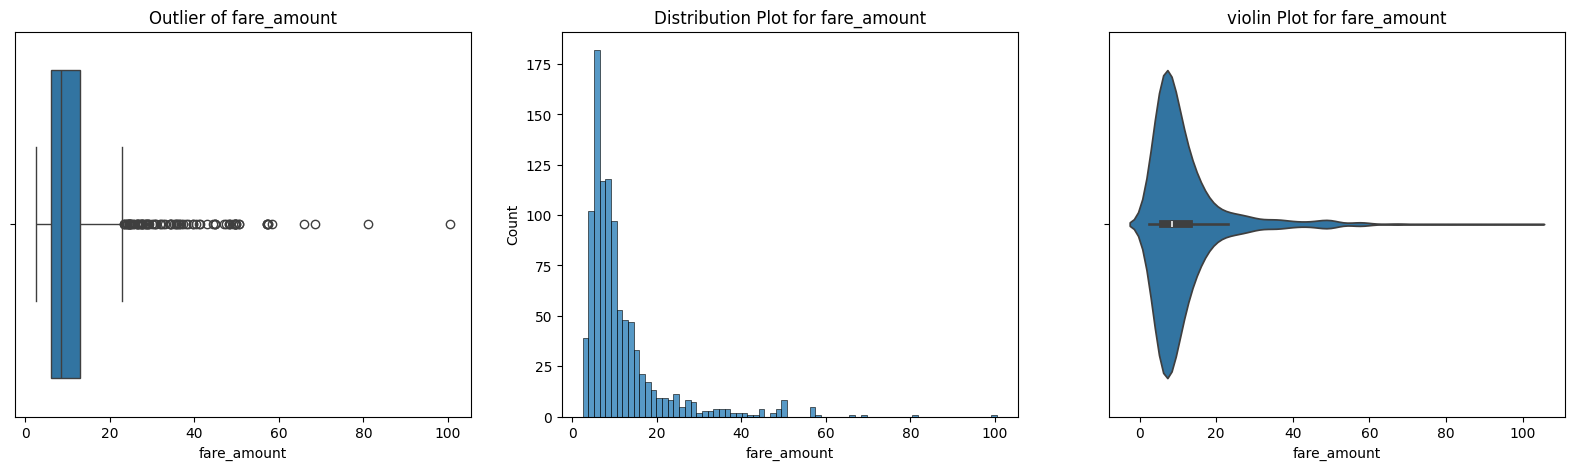

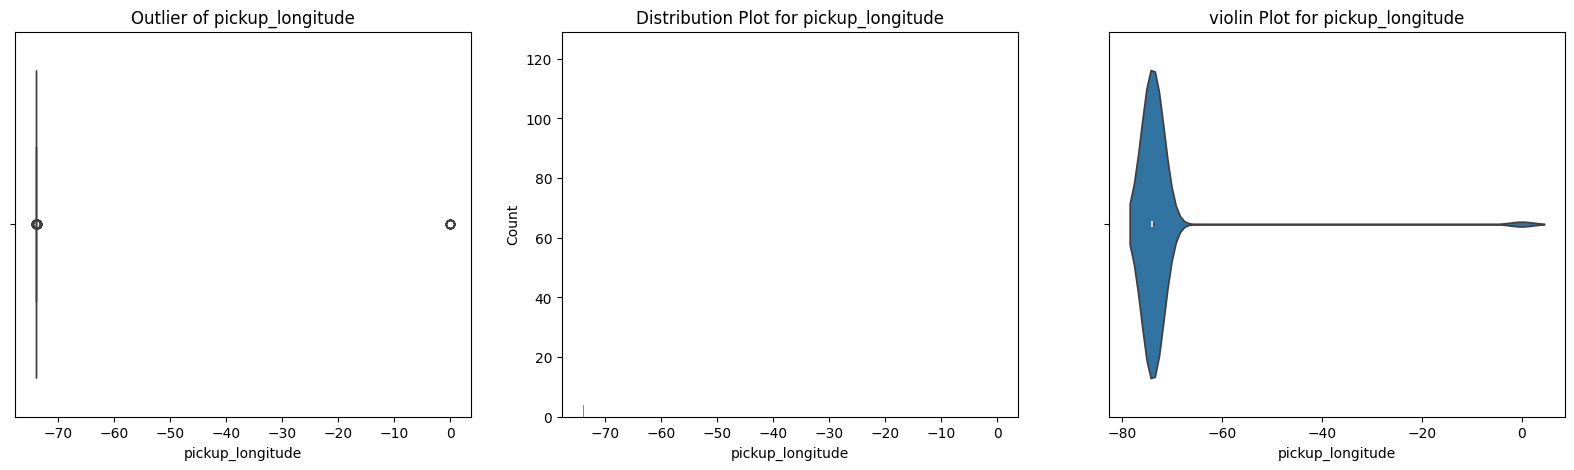

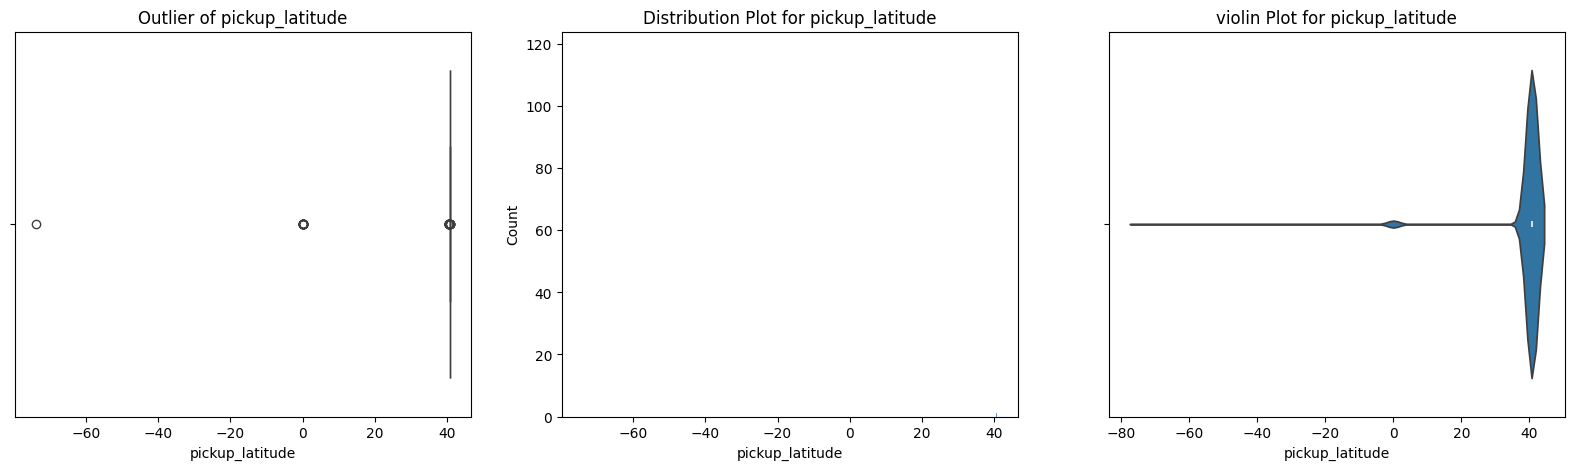

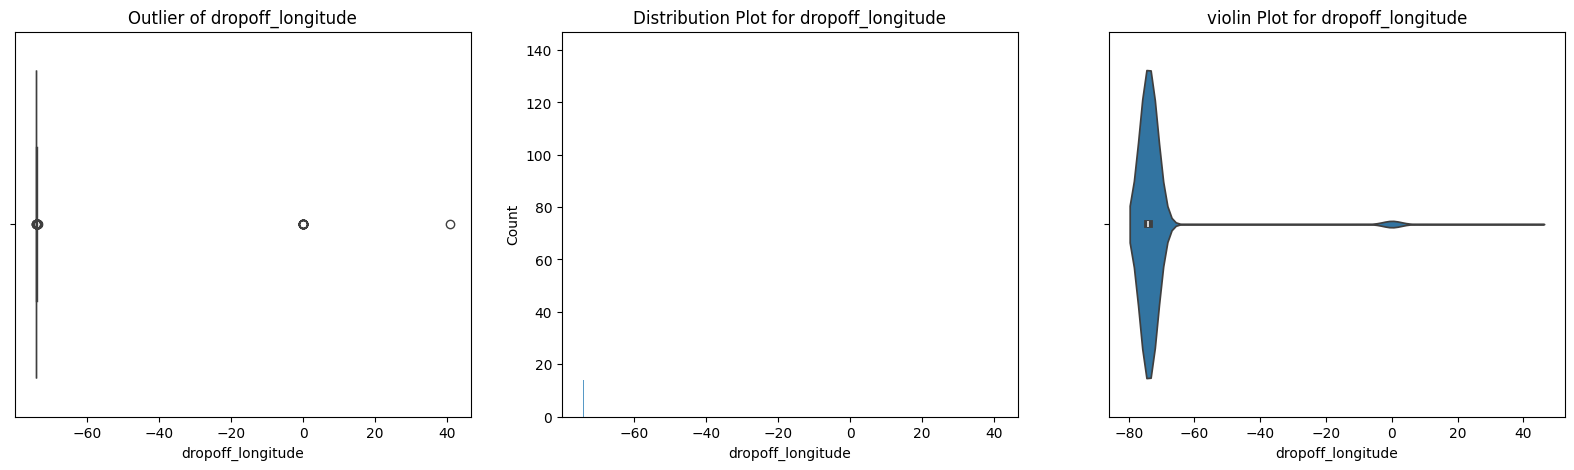

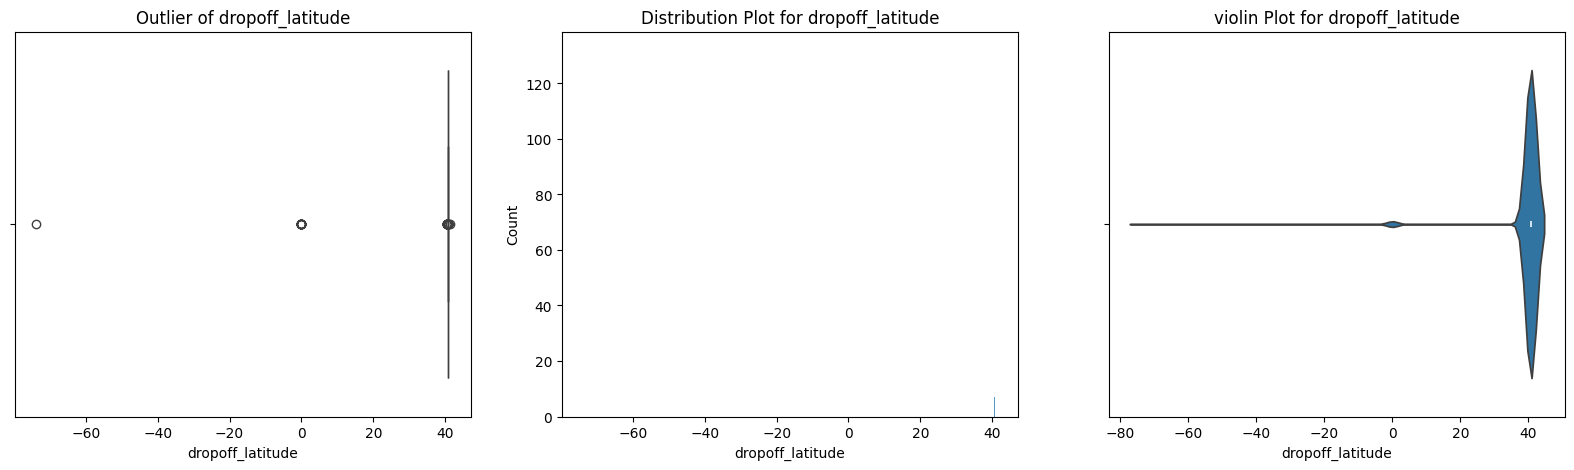

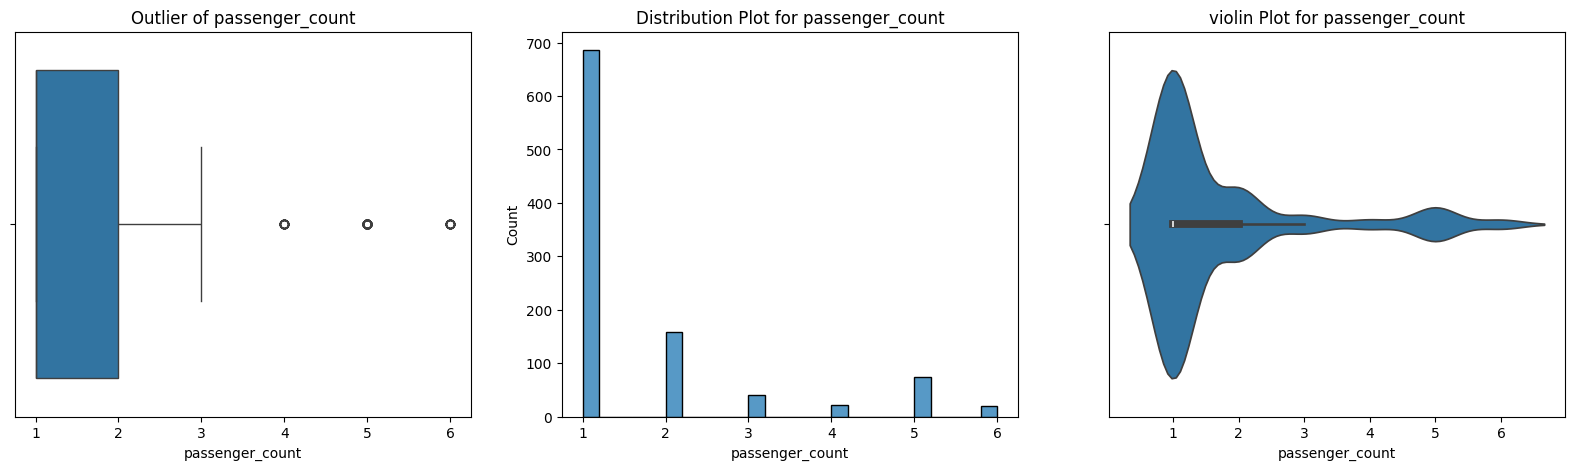

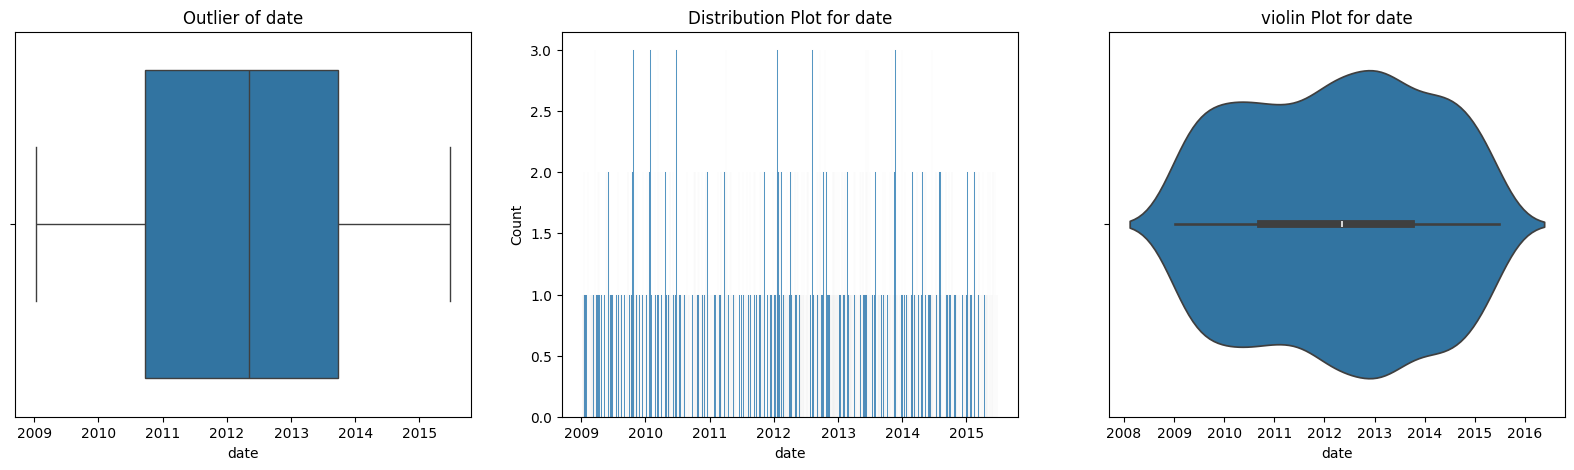

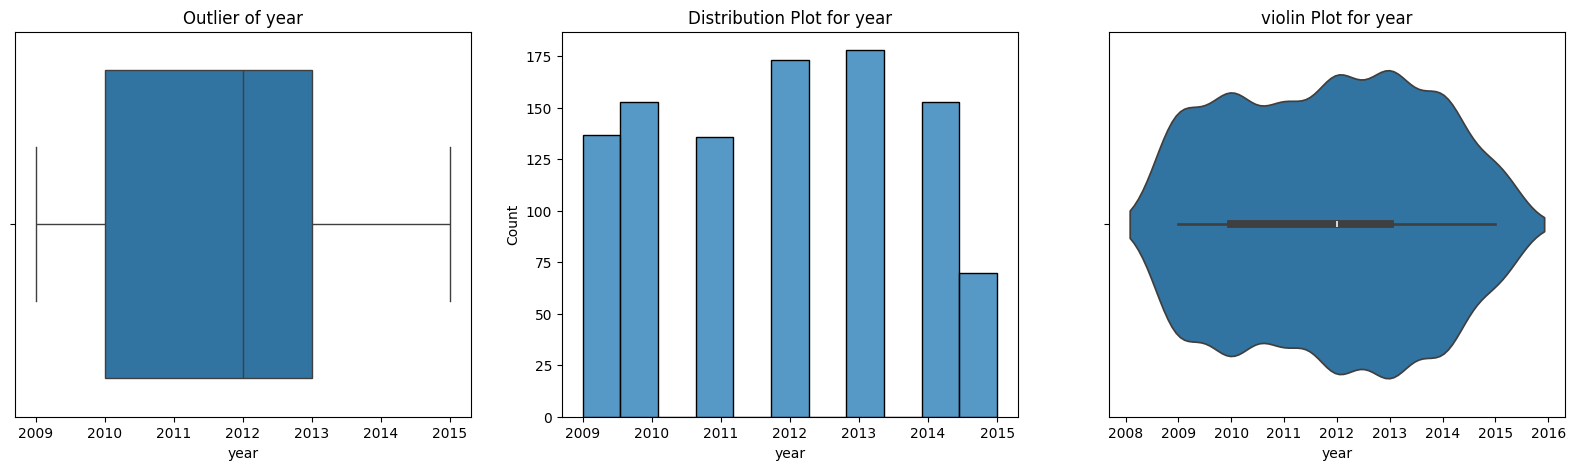

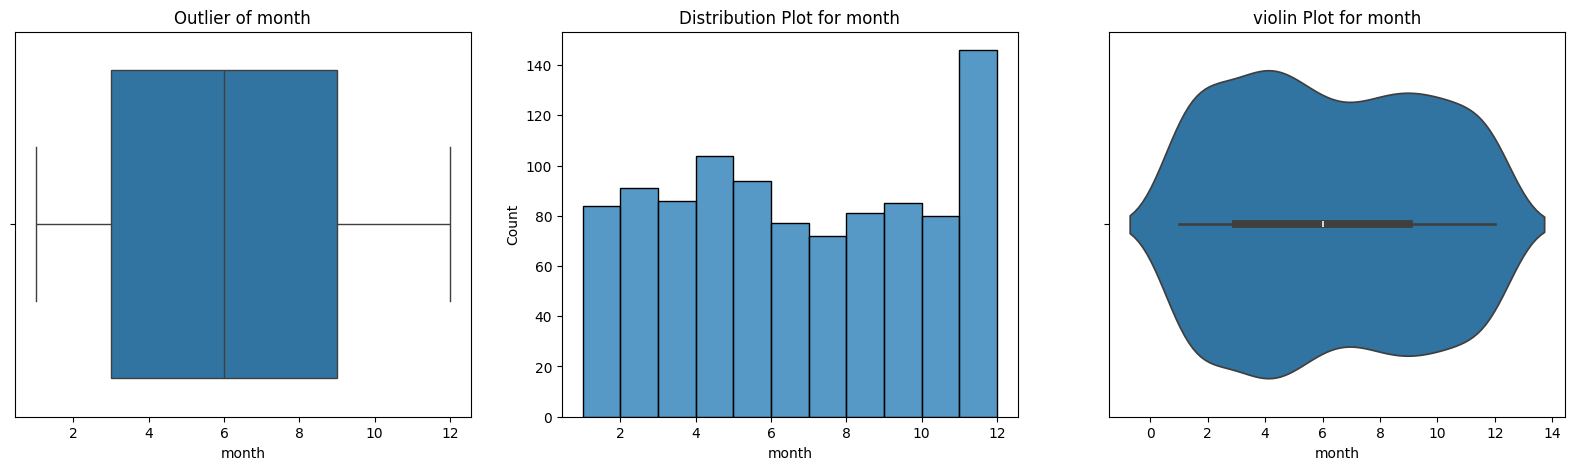

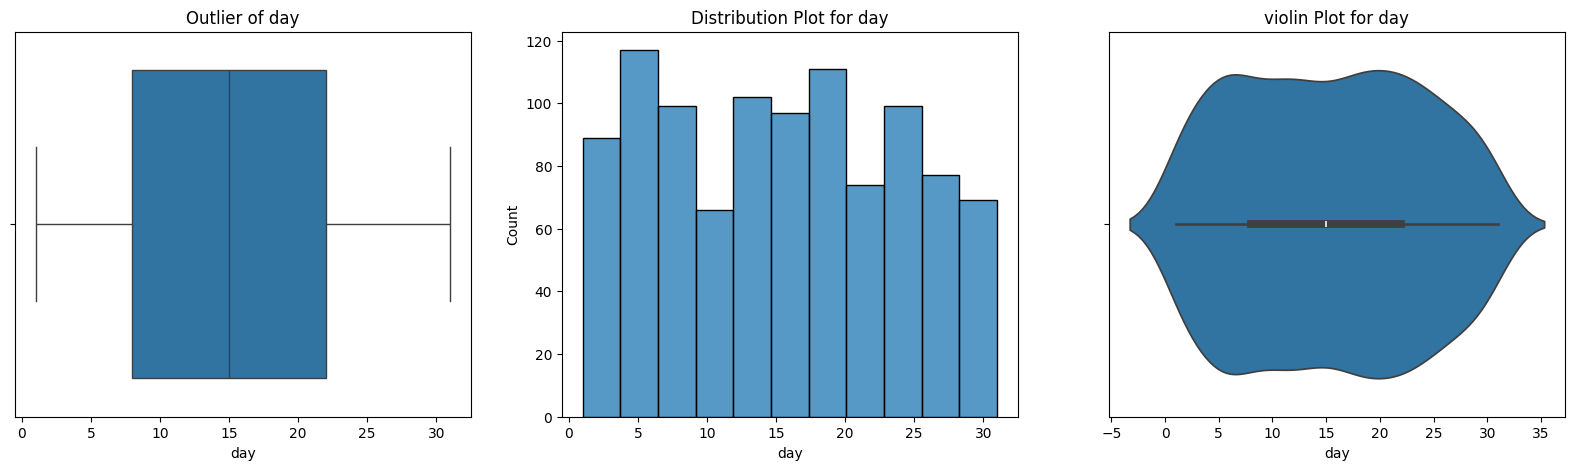

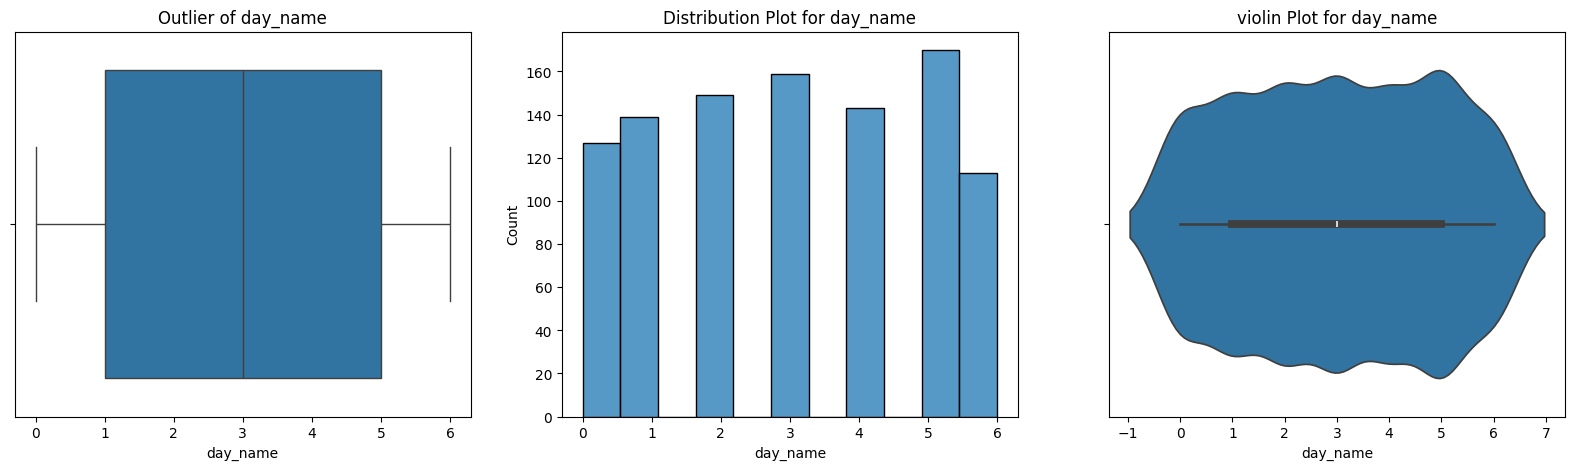

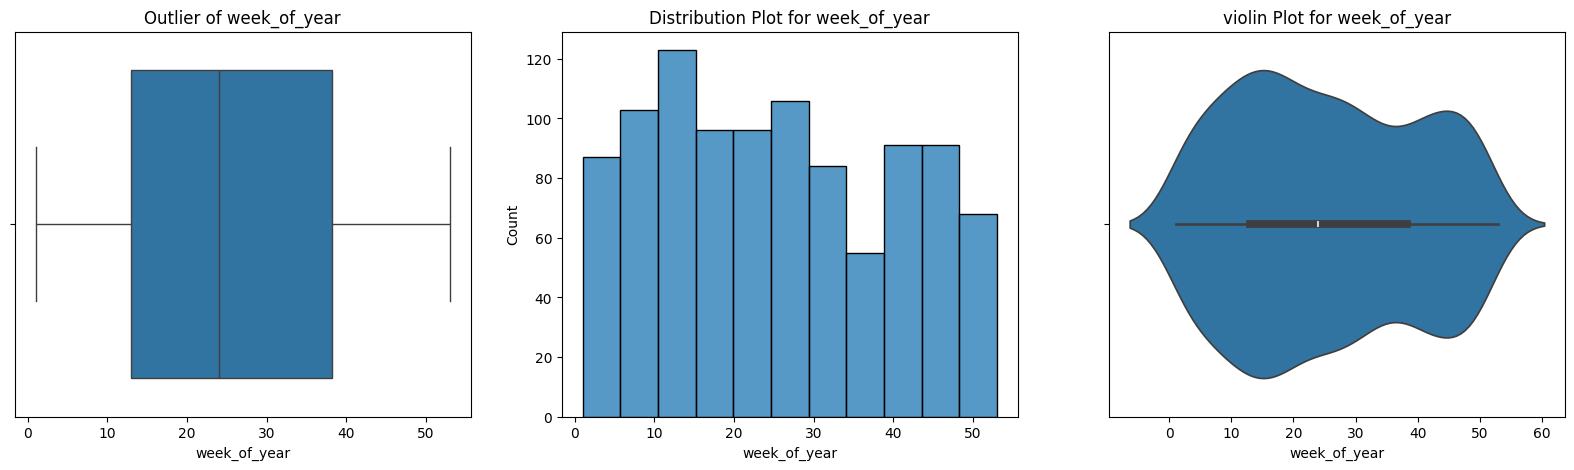

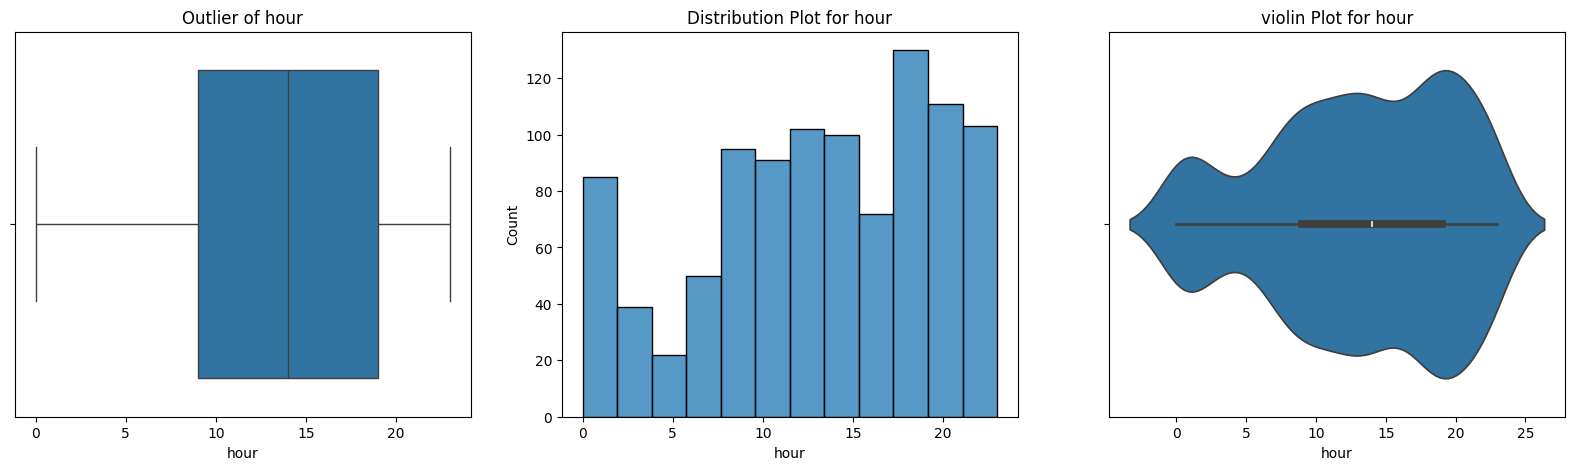

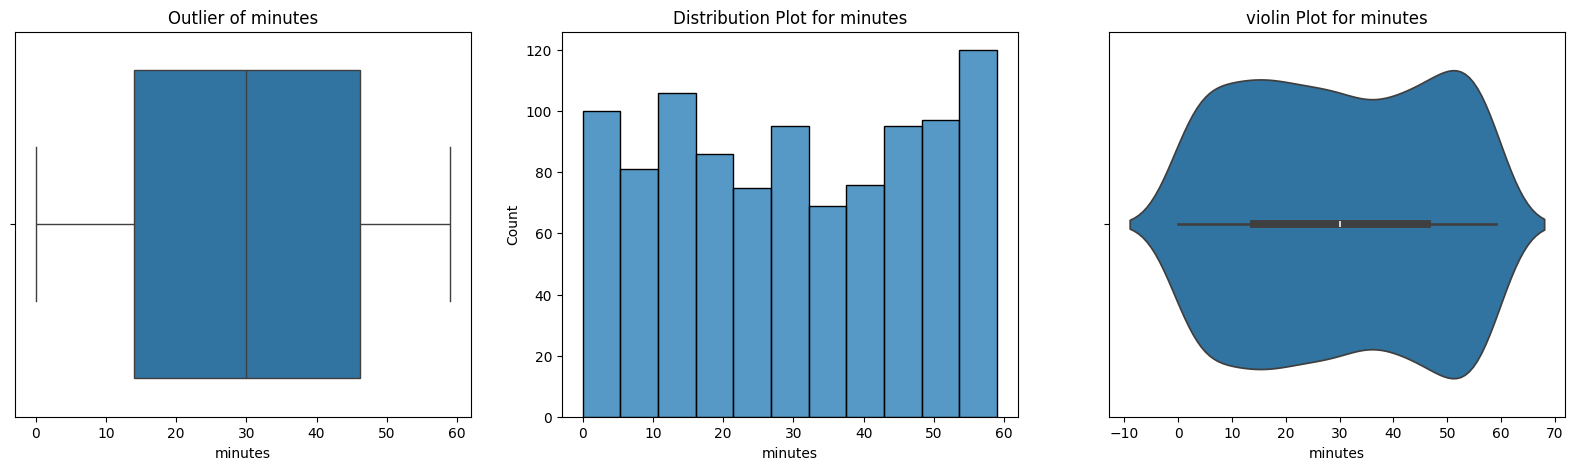

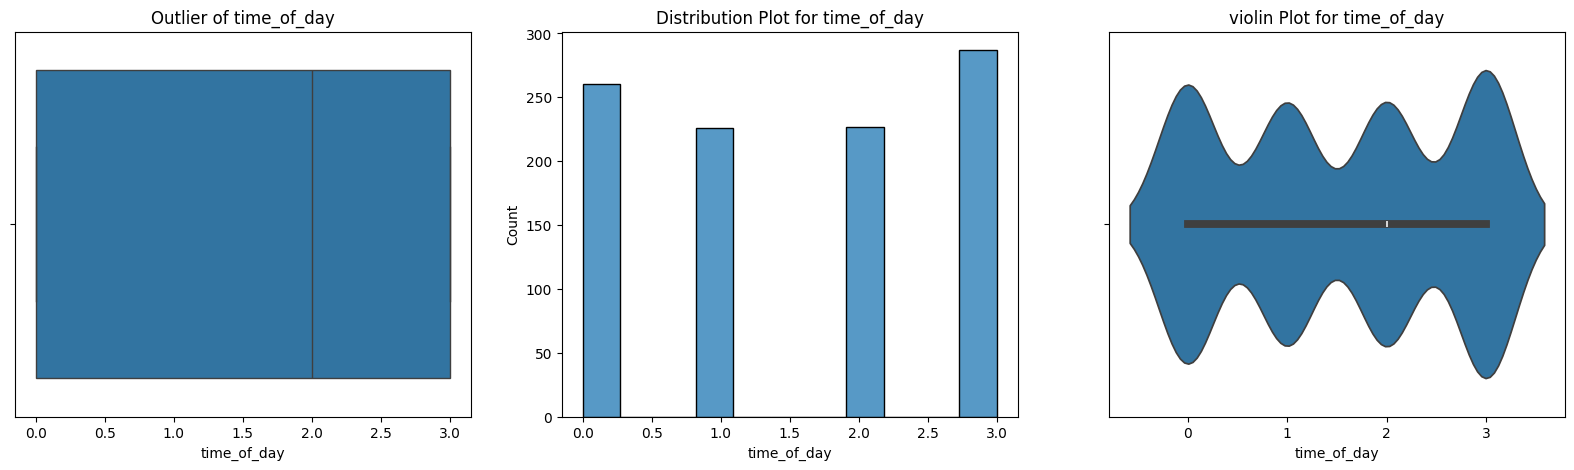

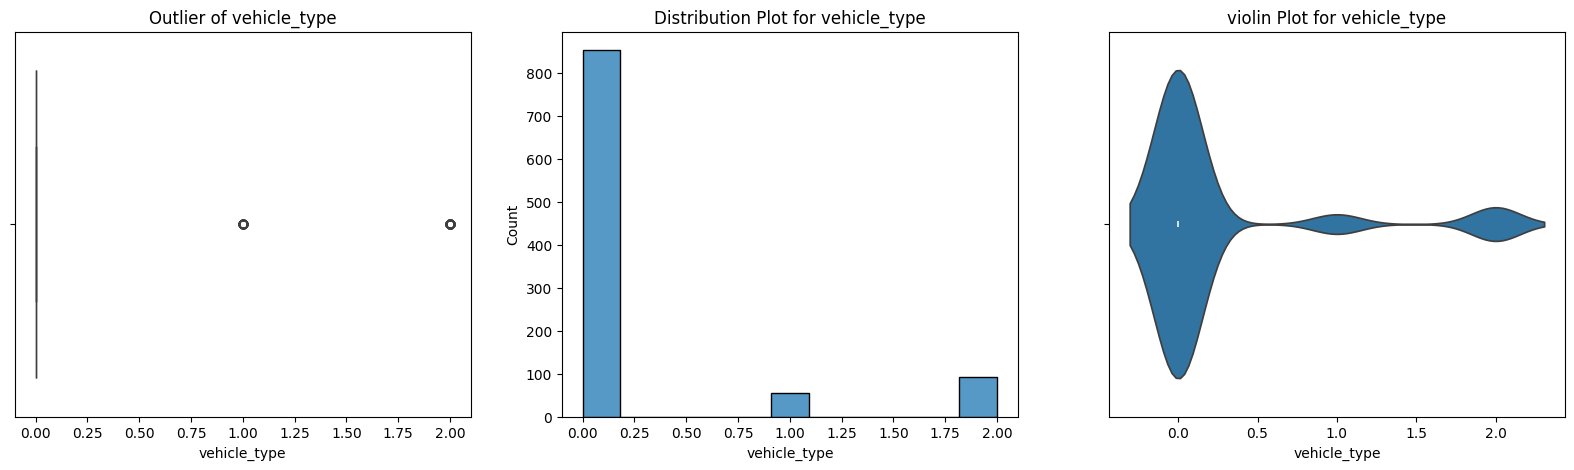

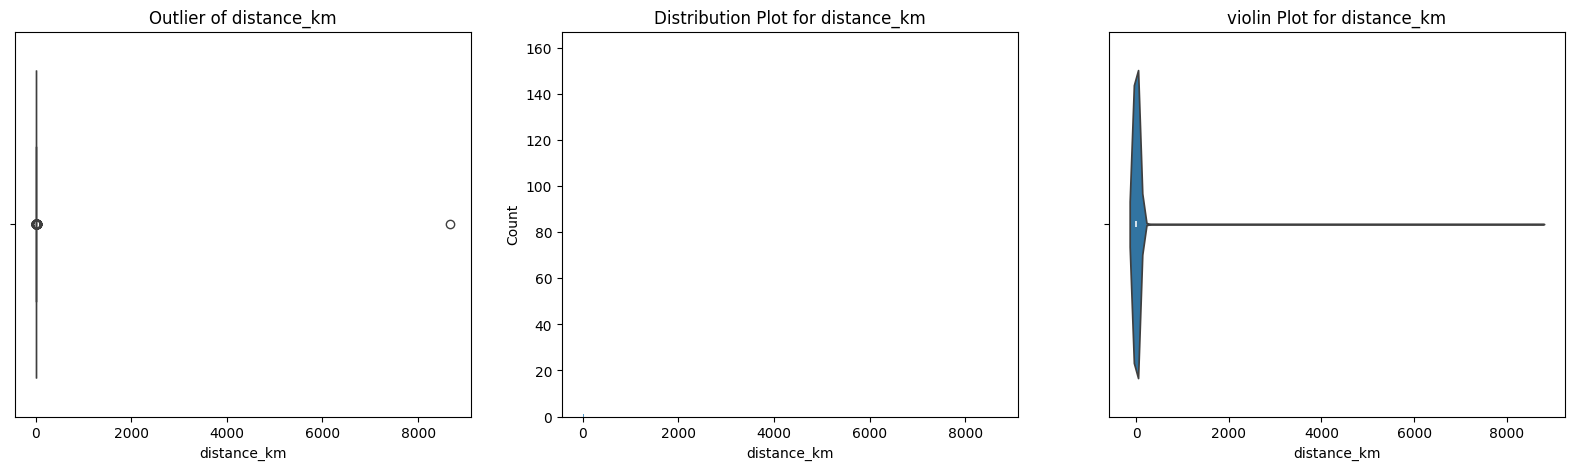

In [69]:
for i in ['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date',
       'year', 'month', 'day', 'day_name', 'week_of_year', 'hour',
       'minutes', 'time_of_day', 'vehicle_type', 'distance_km']:
    plot(df_skew,i)

## Finding best method for skewd

In [70]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
df_skew_find=df_skew.copy()
df_skew_find

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015-05-07,2015,5,7,3,19,19:52:06,19,52,2,0,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009-07-17,2009,7,17,4,29,20:04:56,20,4,2,0,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009-08-24,2009,8,24,0,35,21:45:00,21,45,3,0,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009-06-26,2009,6,26,4,26,08:22:21,8,22,0,1,1.662
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,2014-08-28,2014,8,28,3,35,17:47:00,17,47,2,2,4.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1.0,2012-10-28,2012,10,28,6,43,10:49:00,10,49,0,0,0.112
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1.0,2014-03-14,2014,3,14,4,11,01:09:00,1,9,3,0,1.875
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2.0,2009-06-29,2009,6,29,0,27,00:42:00,0,42,3,0,12.850
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1.0,2015-05-20,2015,5,20,2,21,14:56:25,14,56,1,0,3.540


In [72]:
def plot_skewd(df,columns):
    
    # Log Transformation
    df['log'] = np.log1p(df[columns])

    # Square Root Transformation
    df['sqrt'] = np.sqrt(df[columns])

    # Box-Cox Transformation
    df['boxcox'], _ = boxcox(df[columns] + 1)  # Adding 1 to handle zero values

    # Yeo-Johnson Transformation
    pt = PowerTransformer(method='yeo-johnson')
    df['yeojohnson'] = pt.fit_transform(df[[columns]])

    # Quantile Transformation
    qt = QuantileTransformer(output_distribution='normal')
    df['quantile'] = qt.fit_transform(df[[columns]])

    plt.figure(figsize=(20, 10))

    # Original Distribution
    plt.subplot(2, 3, 1)
    sns.histplot(df[columns], kde=True)
    plt.title('Original Distribution')

    # Log Transformation
    plt.subplot(2, 3, 2)
    sns.histplot(df['log'], kde=True)
    plt.title('Log Transformation')

    # Square Root Transformation
    plt.subplot(2, 3, 3)
    sns.histplot(df['sqrt'], kde=True)
    plt.title('Square Root Transformation')

    # Box-Cox Transformation
    plt.subplot(2, 3, 4)
    sns.histplot(df['boxcox'], kde=True)
    plt.title('Box-Cox Transformation')

    # Yeo-Johnson Transformation
    plt.subplot(2, 3, 5)
    sns.histplot(df['yeojohnson'], kde=True)
    plt.title('Yeo-Johnson Transformation')

    # Quantile Transformation
    plt.subplot(2, 3, 6)
    sns.histplot(df['quantile'], kde=True)
    plt.title('Quantile Transformation')

    plt.tight_layout()
    plt.show()


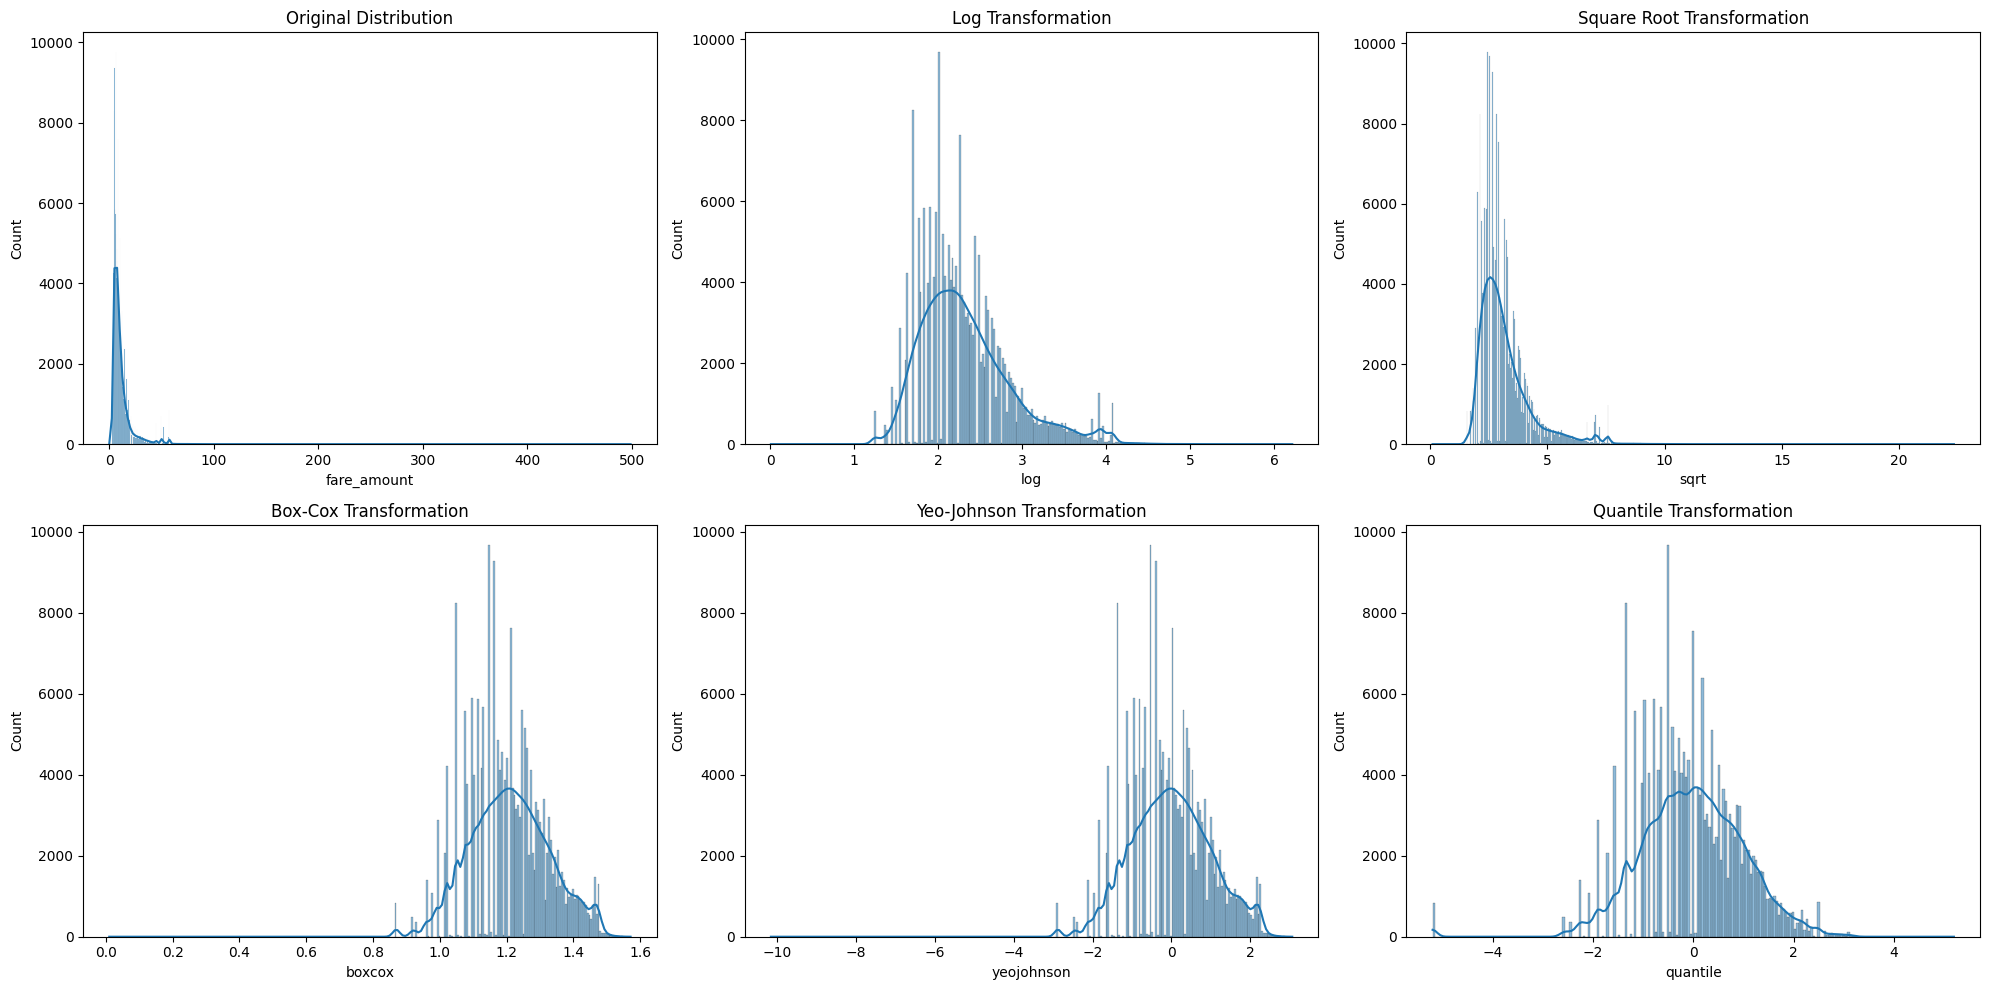

In [73]:
plot_skewd(df_skew_find,"fare_amount")

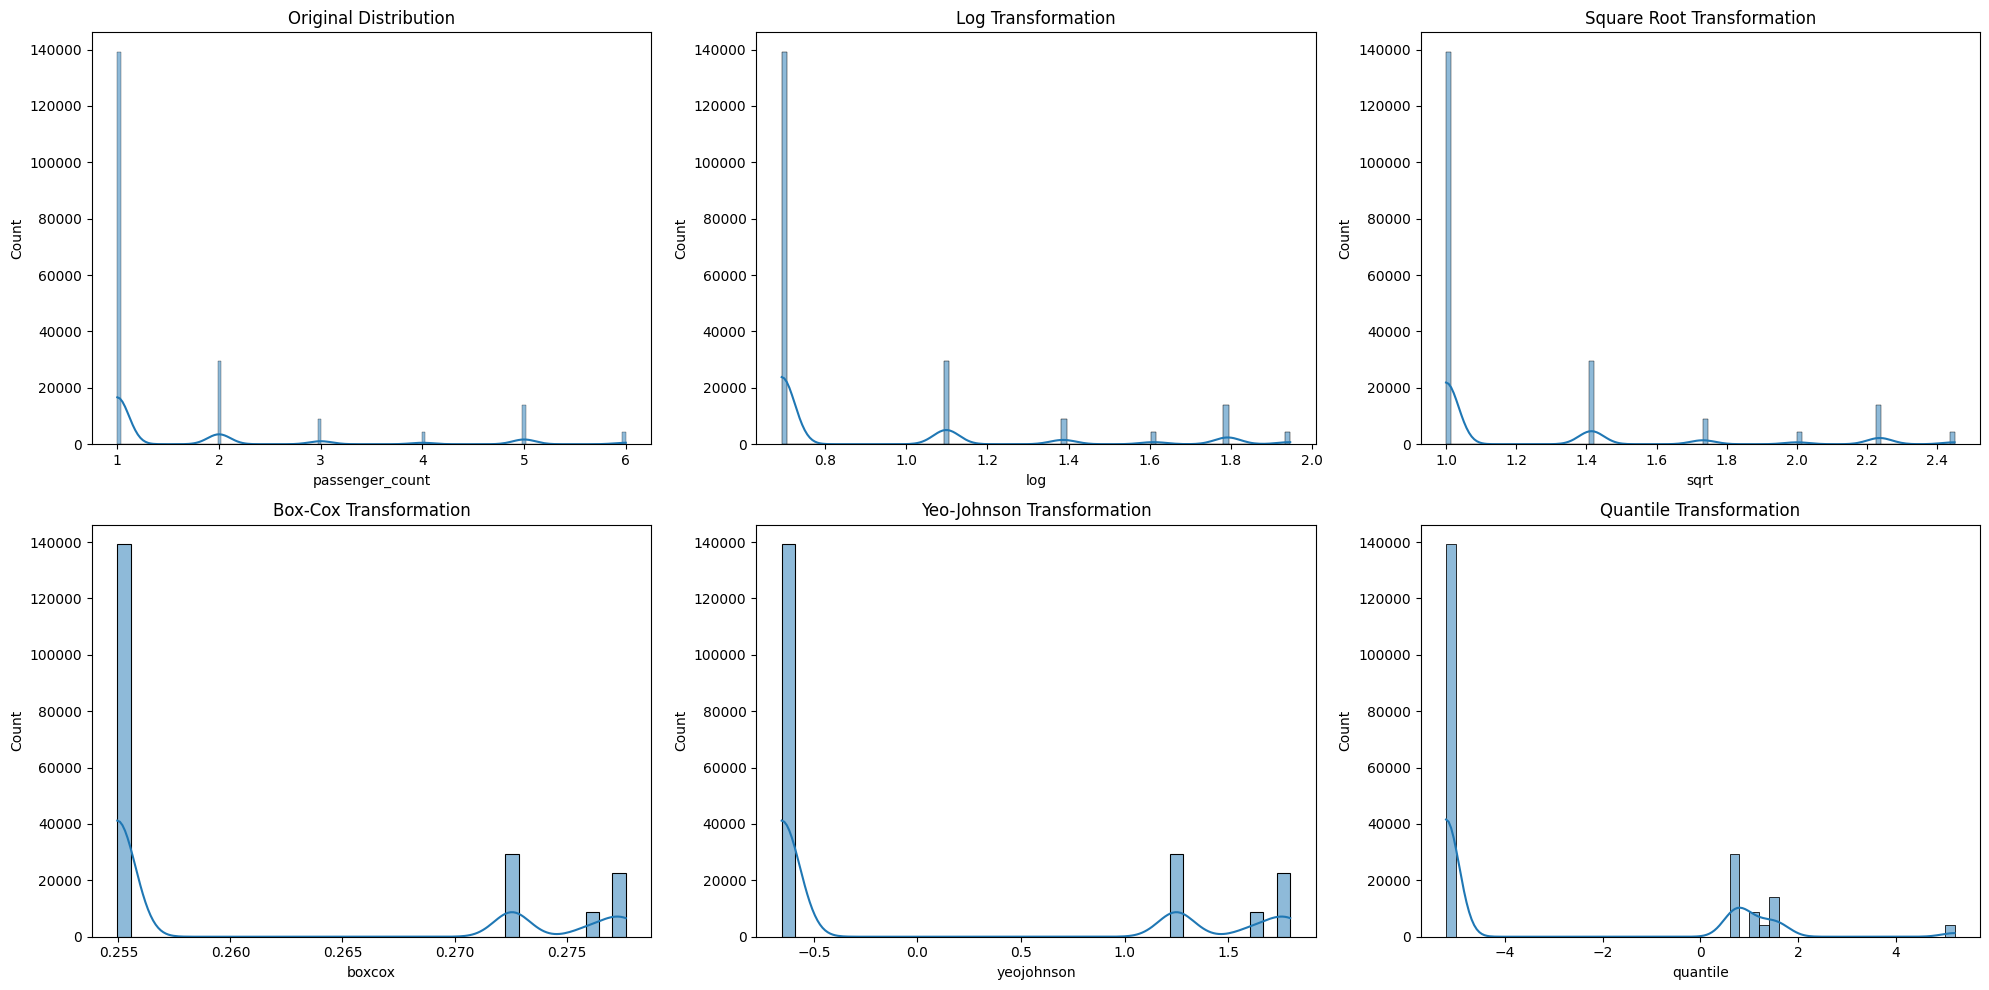

In [74]:
plot_skewd(df_skew_find,'passenger_count')

In [75]:
df4.info()

NameError: name 'df4' is not defined

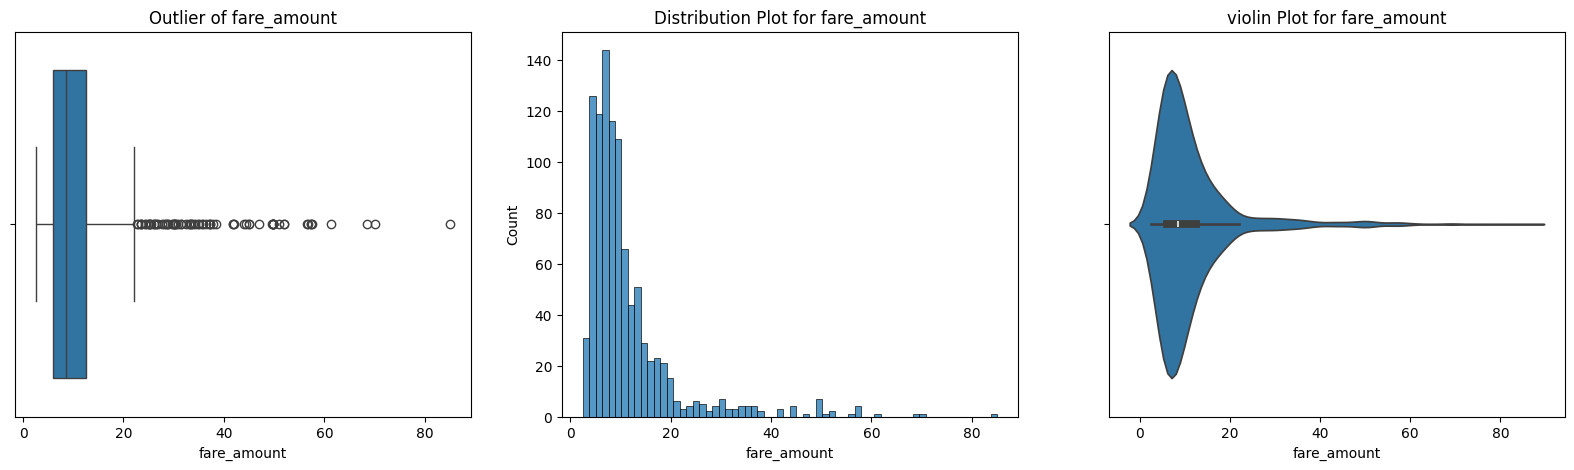

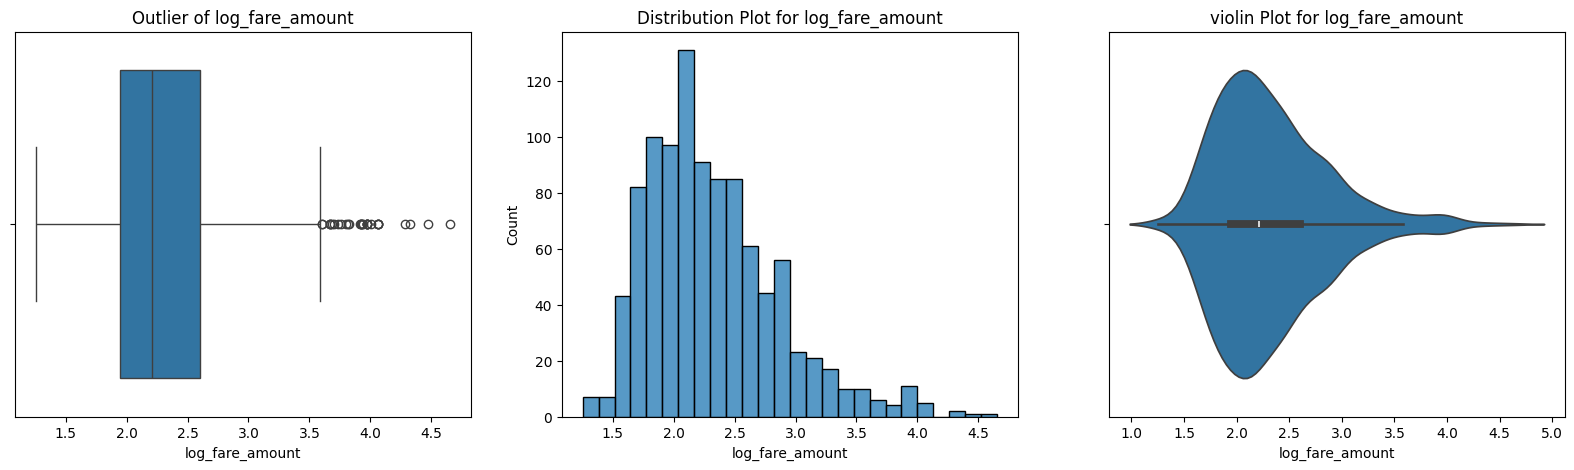

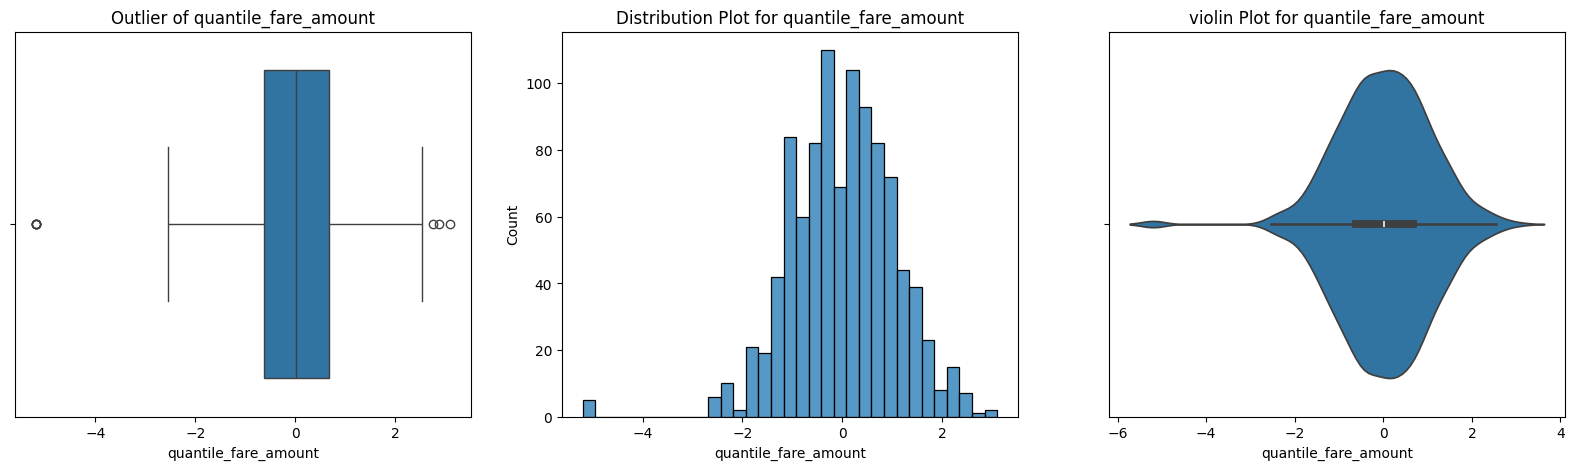

In [ ]:
for i in ["fare_amount","log_fare_amount","quantile_fare_amount"]:
    plot(df4, i)

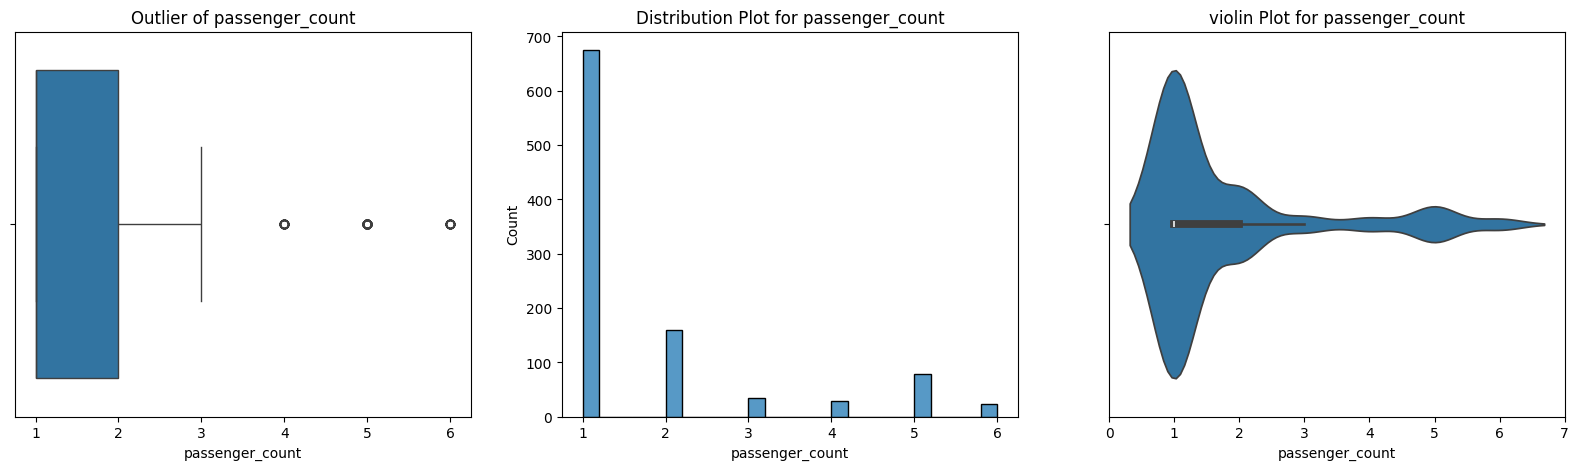

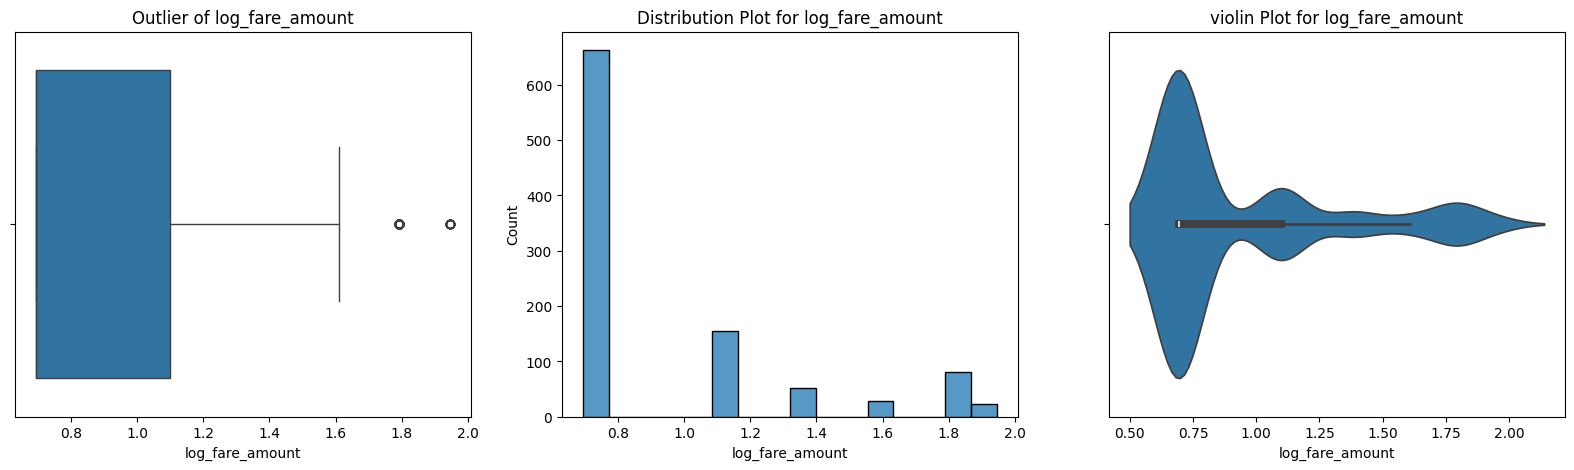

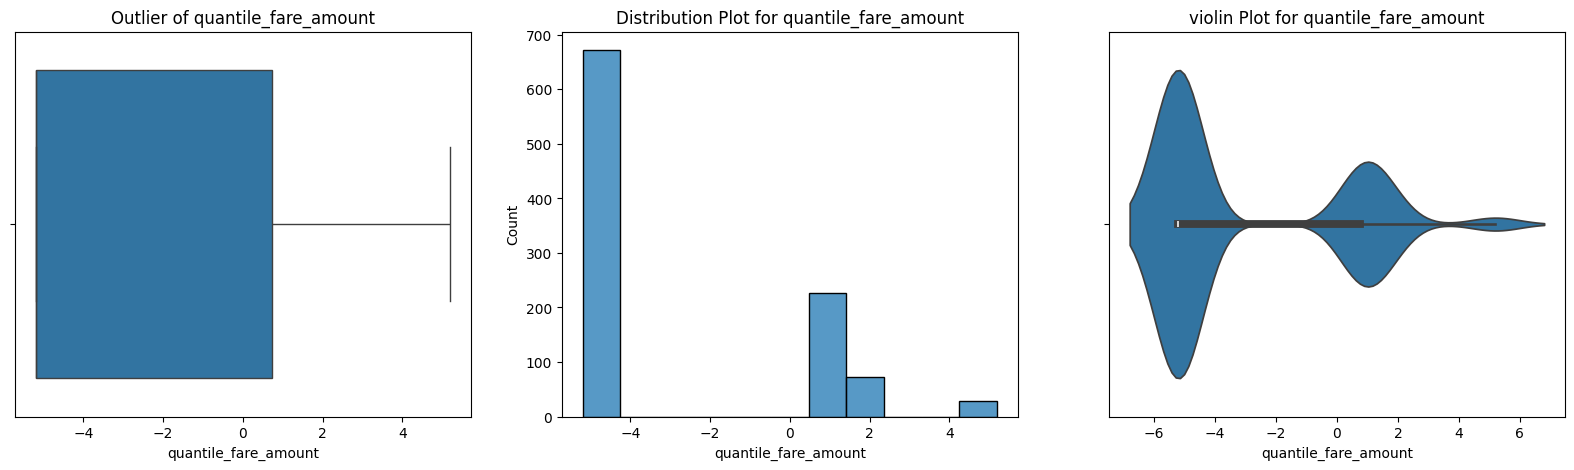

In [ ]:
for i in ["passenger_count","log_fare_amount","quantile_fare_amount"]:
    plot(df4, i)

from the above conclusion is says that log transform is good to handle skweness

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  200000 non-null  float64
 6   dropoff_latitude   200000 non-null  float64
 7   passenger_count    200000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.2+ MB


In [ ]:
df3['fare_amount_log'] = np.log(df3['fare_amount'])
df3['passenger_count_log'] = np.log(df3['passenger_count'])

df3

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount_log,passenger_count_log
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0,2.014903,0.000000
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0,2.041220,0.000000
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0,2.557227,0.000000
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0,1.667707,1.098612
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0,2.772589,1.609438
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1.0,1.098612,0.000000
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1.0,2.014903,0.000000
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2.0,3.430756,0.693147
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1.0,2.674149,0.000000


## Before  and After Skwness

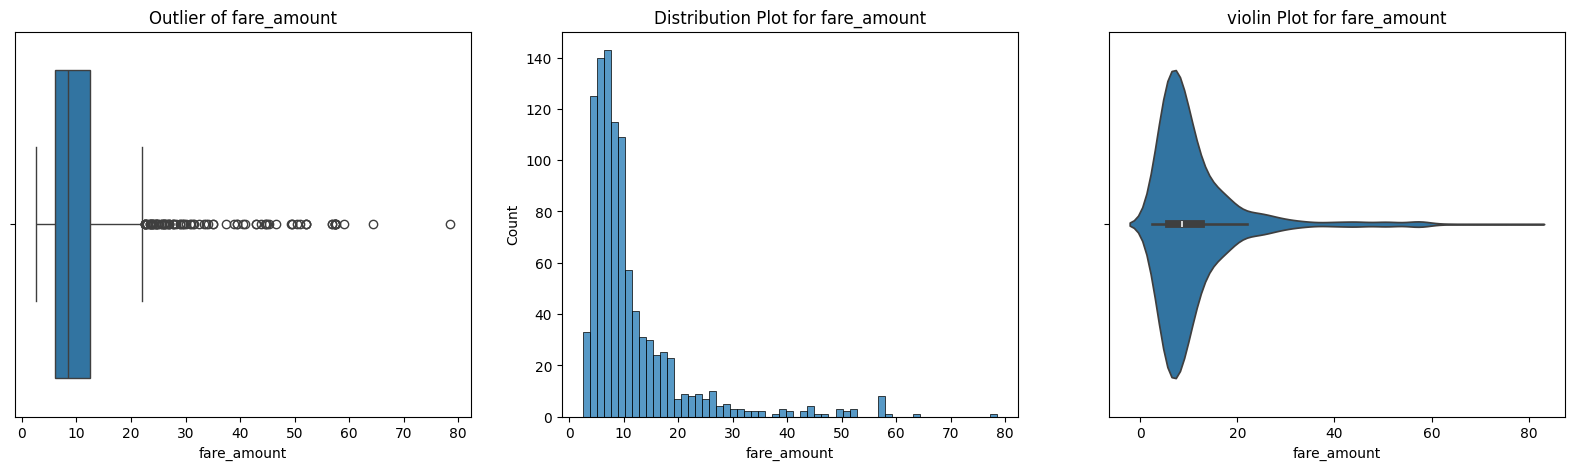

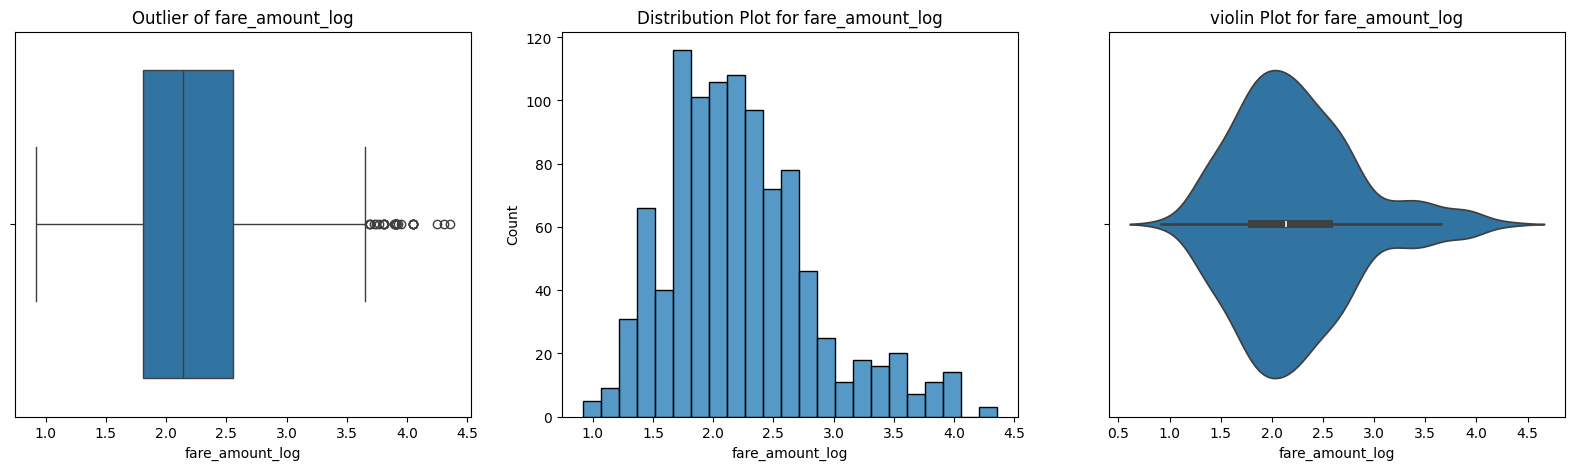

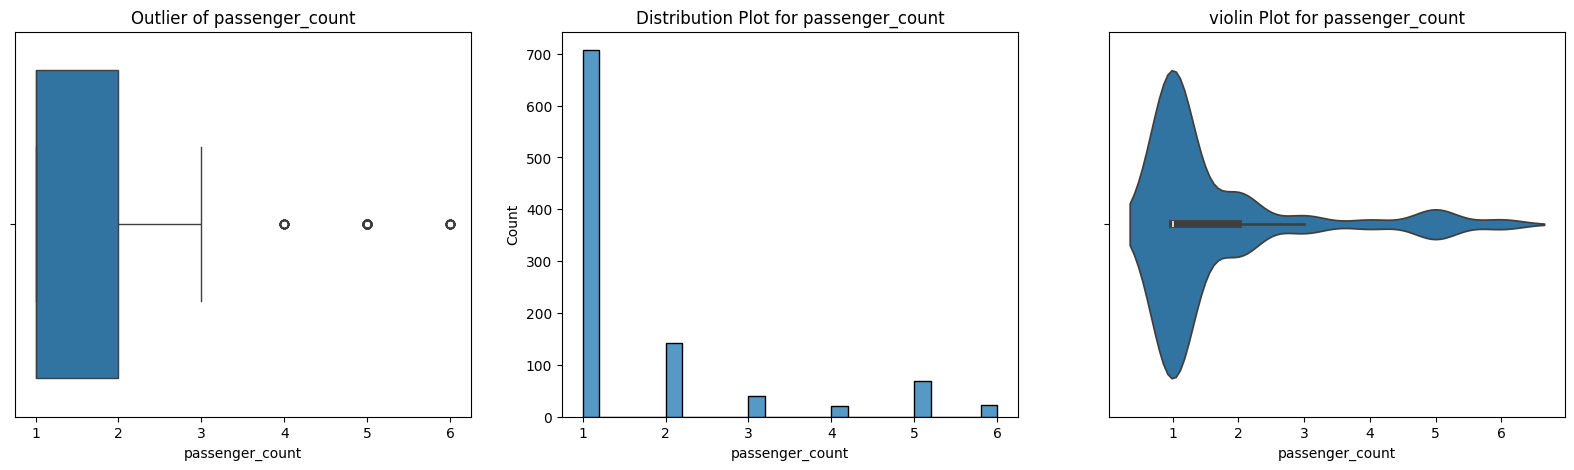

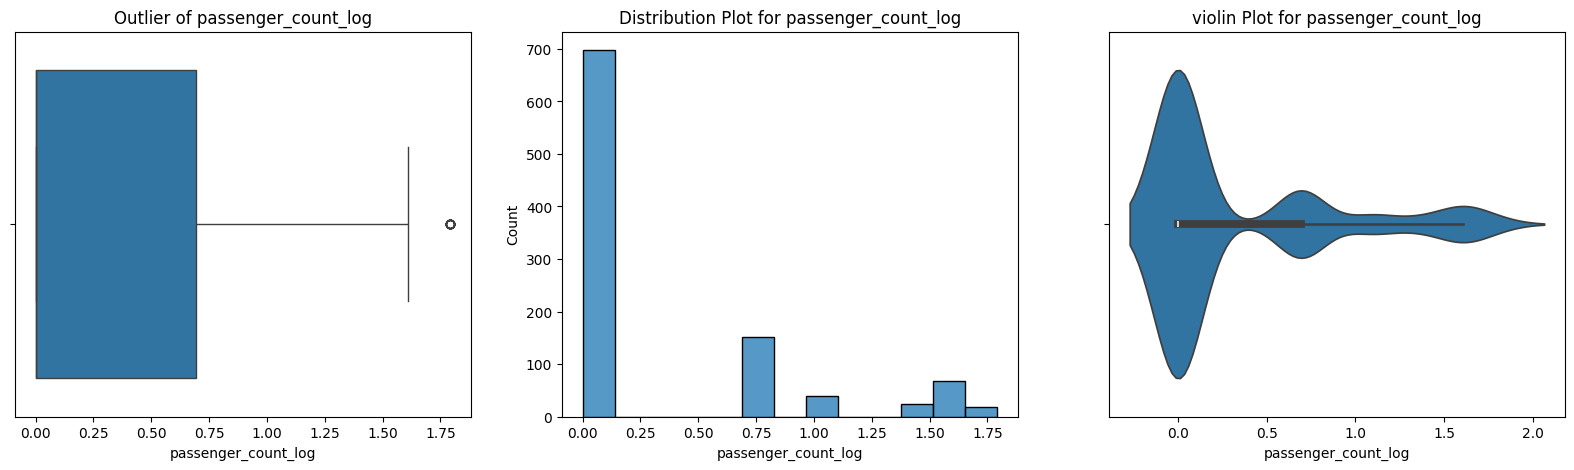

In [ ]:
for i in ["fare_amount","fare_amount_log","passenger_count","passenger_count_log"]:
    plot(df3,i)

# Outliers Handling - Interquartile Range (IQR) method

In [77]:
df_out=df_skew.copy()
df_out

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015-05-07,2015,5,7,3,19,19:52:06,19,52,2,0,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009-07-17,2009,7,17,4,29,20:04:56,20,4,2,0,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009-08-24,2009,8,24,0,35,21:45:00,21,45,3,0,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009-06-26,2009,6,26,4,26,08:22:21,8,22,0,1,1.662
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,2014-08-28,2014,8,28,3,35,17:47:00,17,47,2,2,4.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1.0,2012-10-28,2012,10,28,6,43,10:49:00,10,49,0,0,0.112
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1.0,2014-03-14,2014,3,14,4,11,01:09:00,1,9,3,0,1.875
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2.0,2009-06-29,2009,6,29,0,27,00:42:00,0,42,3,0,12.850
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1.0,2015-05-20,2015,5,20,2,21,14:56:25,14,56,1,0,3.540


In [78]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  200000 non-null  float64
 4   dropoff_latitude   200000 non-null  float64
 5   passenger_count    200000 non-null  float64
 6   date               200000 non-null  object 
 7   year               200000 non-null  int32  
 8   month              200000 non-null  int32  
 9   day                200000 non-null  int32  
 10  day_name           200000 non-null  int64  
 11  week_of_year       200000 non-null  UInt32 
 12  time               200000 non-null  object 
 13  hour               200000 non-null  int32  
 14  minutes            200000 non-null  int32  
 15  time_of_day        200000 non-null  int64  
 16  ve

In [79]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [ ]:
["fare_amount","fare_amount_log","passenger_count","passenger_count_log"]

In [80]:
outlier(df_out, 'fare_amount')
outlier(df_out, 'passenger_count')
#outlier(df_out, 'vehicle_type')
outlier(df_out, 'distance_km')
outlier(df_out, 'pickup_latitude')
outlier(df_out, 'pickup_longitude')
outlier(df_out, 'dropoff_latitude')
outlier(df_out, 'dropoff_longitude')
df_out

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,2015-05-07,2015,5,7,3,19,19:52:06,19,52,2,0,1.683
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,2009-07-17,2009,7,17,4,29,20:04:56,20,4,2,0,2.458
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,2009-08-24,2009,8,24,0,35,21:45:00,21,45,3,0,5.036
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,2009-06-26,2009,6,26,4,26,08:22:21,8,22,0,1,1.662
4,16.00,-73.929786,40.744085,-73.973082,40.761247,3.5,2014-08-28,2014,8,28,3,35,17:47:00,17,47,2,2,4.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,2012-10-28,2012,10,28,6,43,10:49:00,10,49,0,0,0.112
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,2014-03-14,2014,3,14,4,11,01:09:00,1,9,3,0,1.875
199997,22.25,-73.986017,40.756487,-73.922034,40.692588,2.0,2009-06-29,2009,6,29,0,27,00:42:00,0,42,3,0,7.865
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,2015-05-20,2015,5,20,2,21,14:56:25,14,56,1,0,3.540


In [81]:
df_out.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date',
       'year', 'month', 'day', 'day_name', 'week_of_year', 'time', 'hour',
       'minutes', 'time_of_day', 'vehicle_type', 'distance_km'],
      dtype='object')

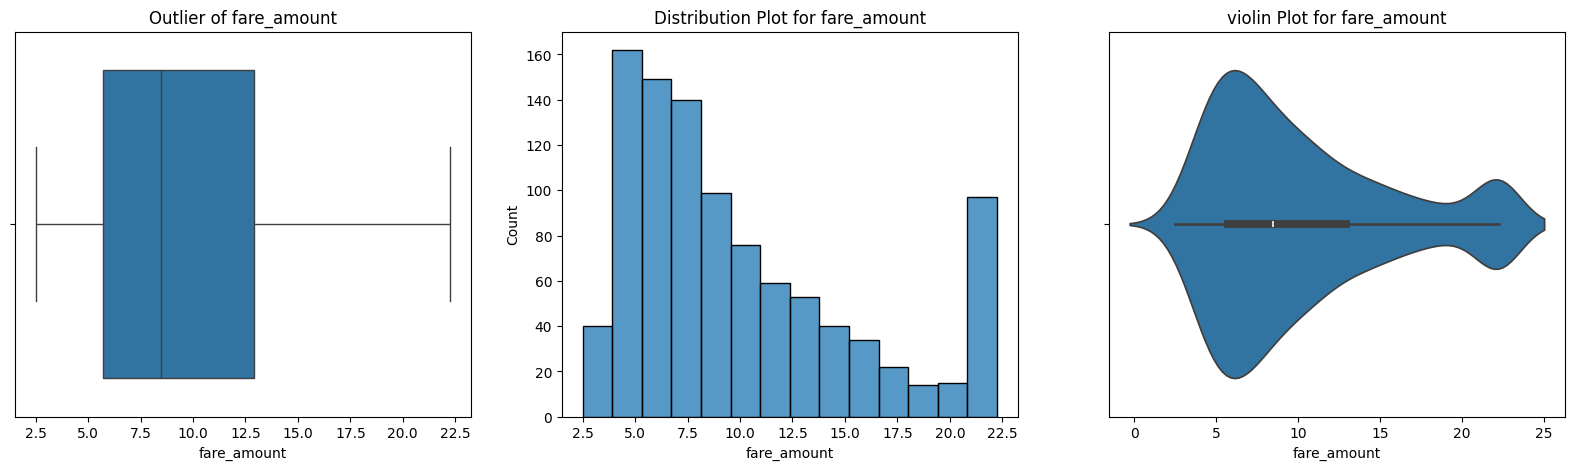

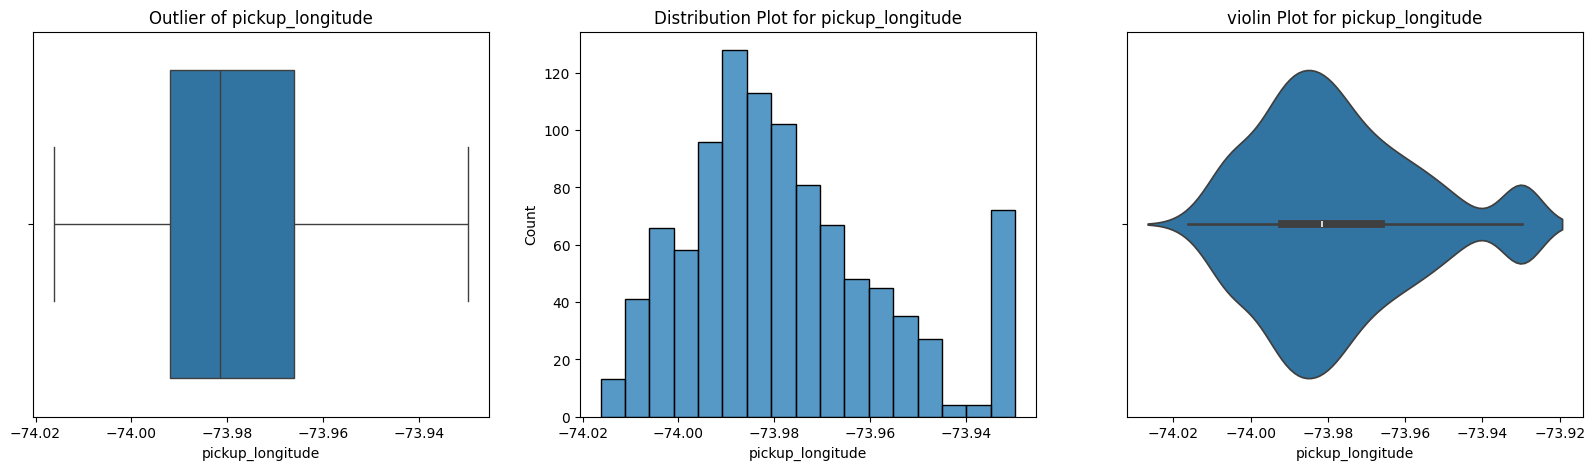

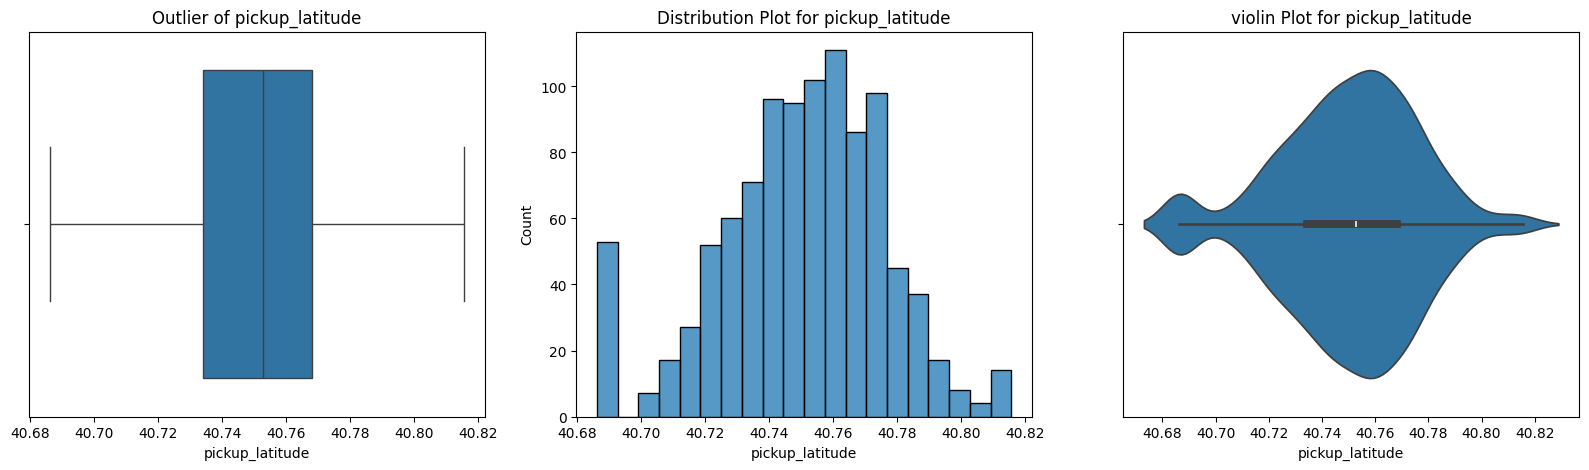

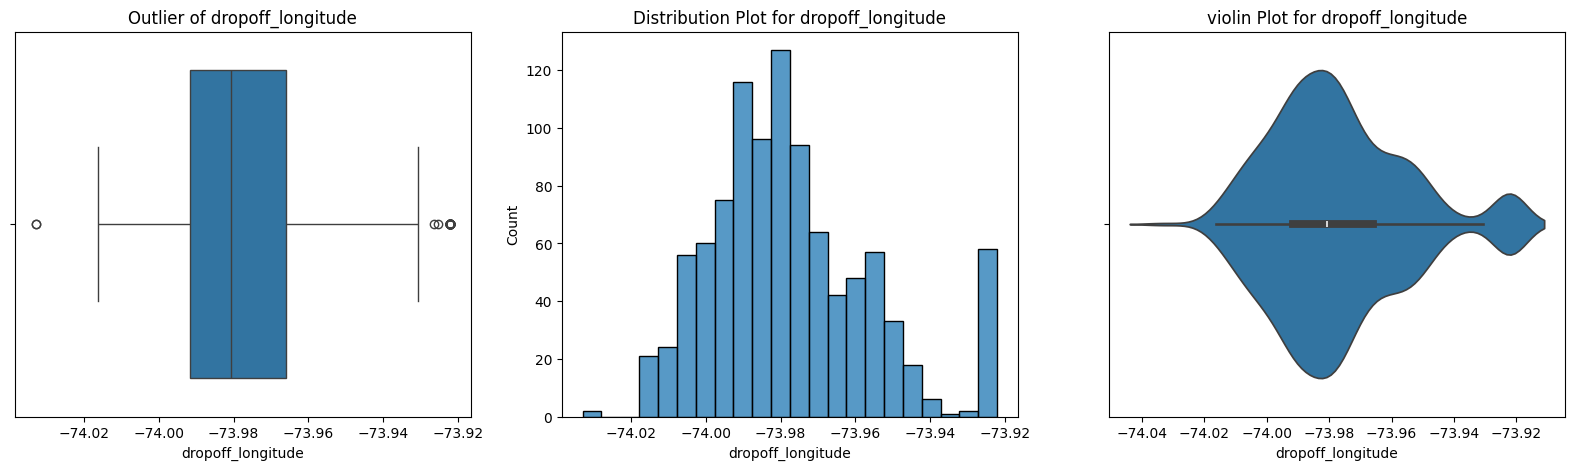

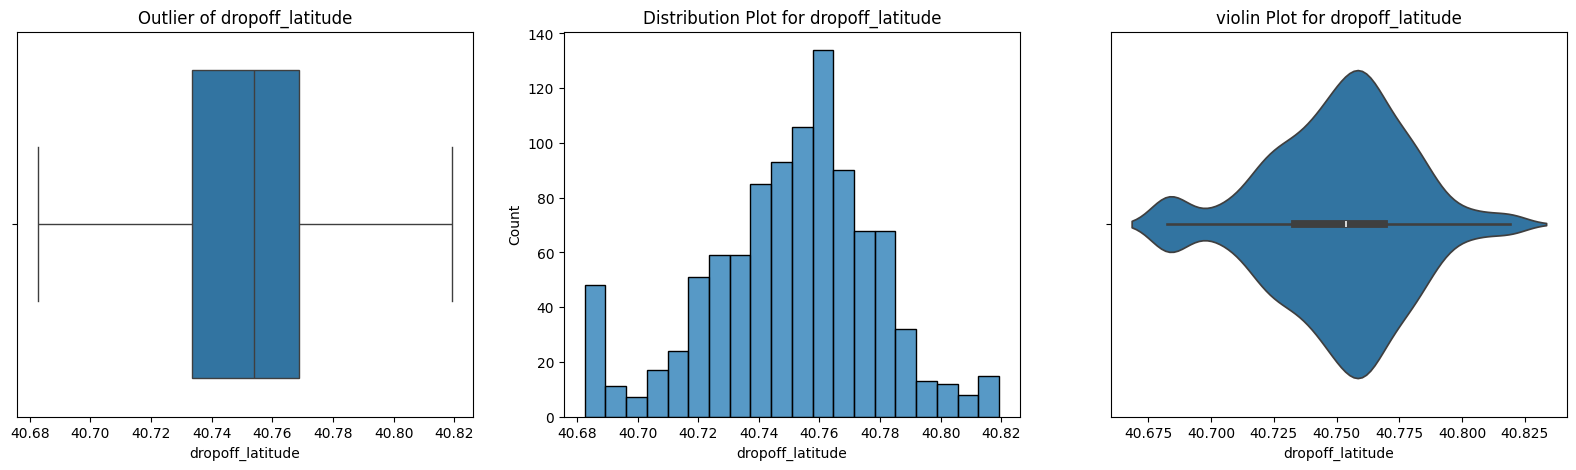

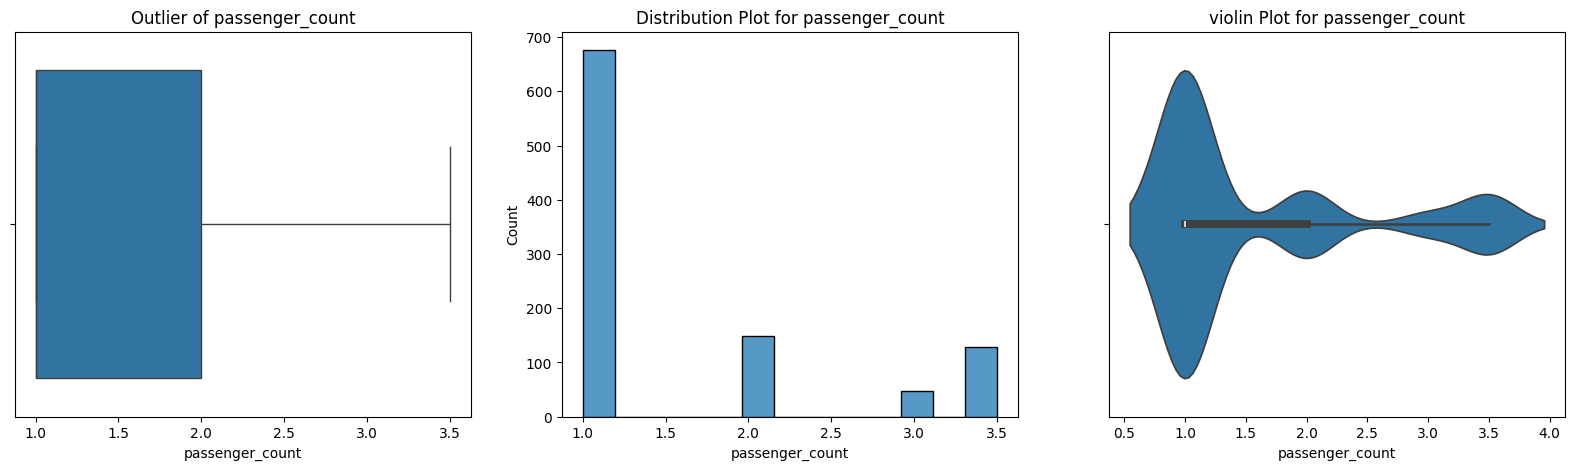

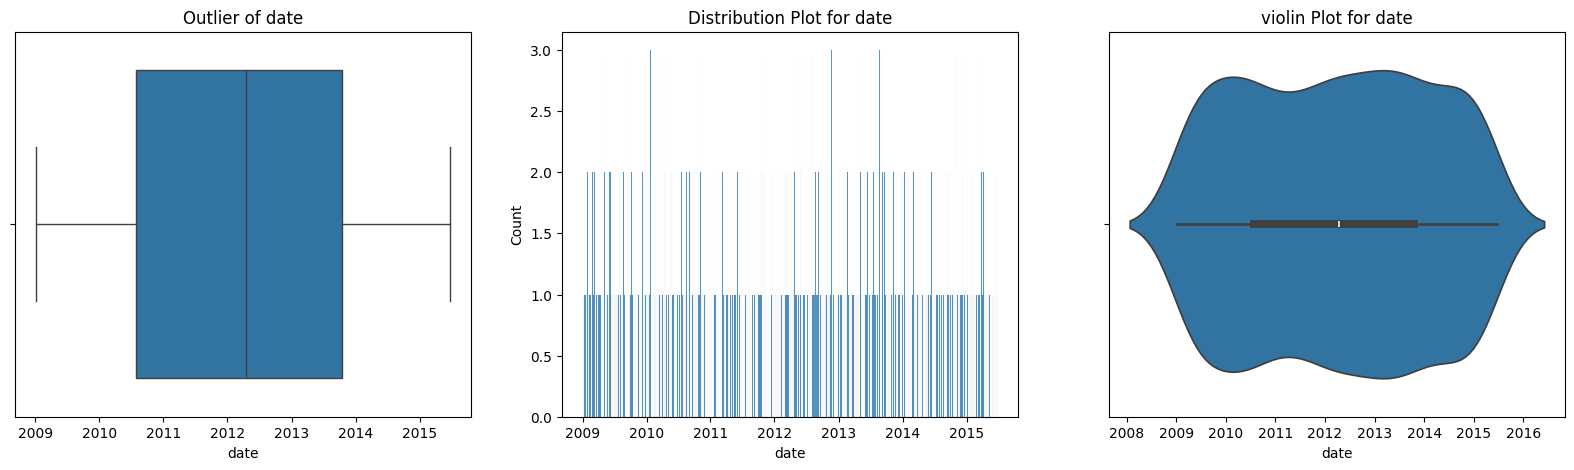

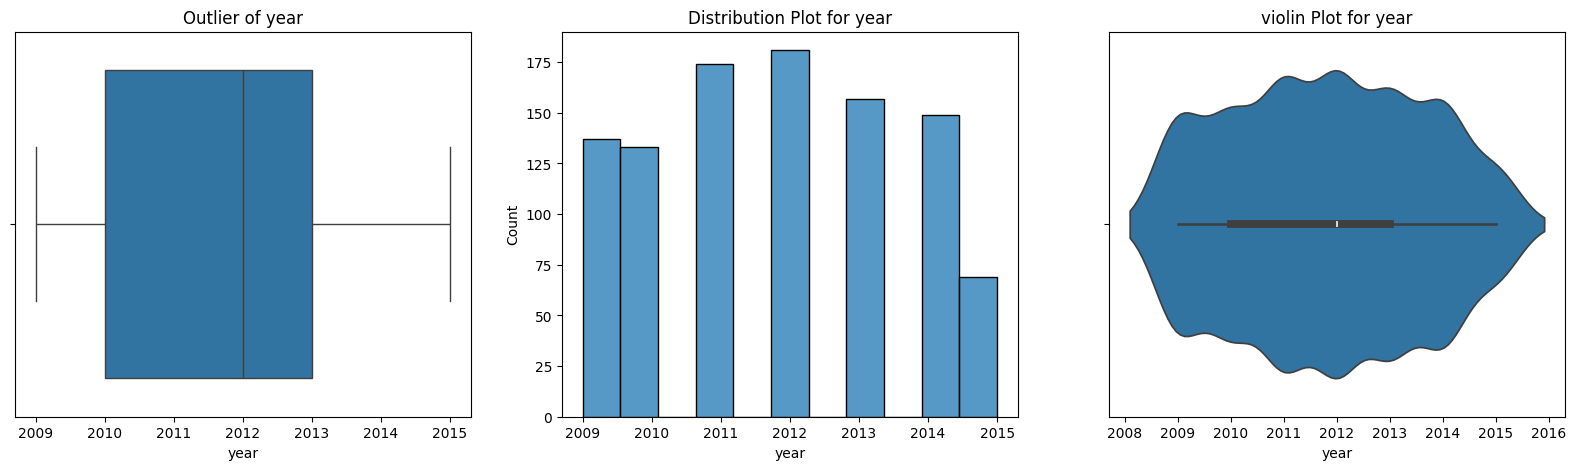

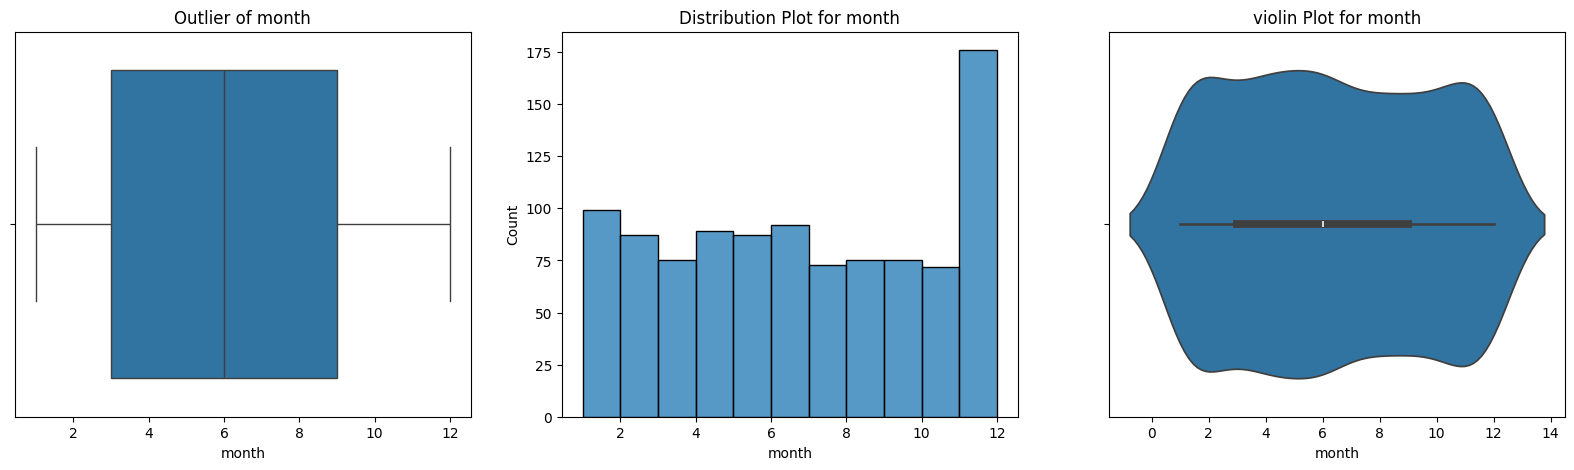

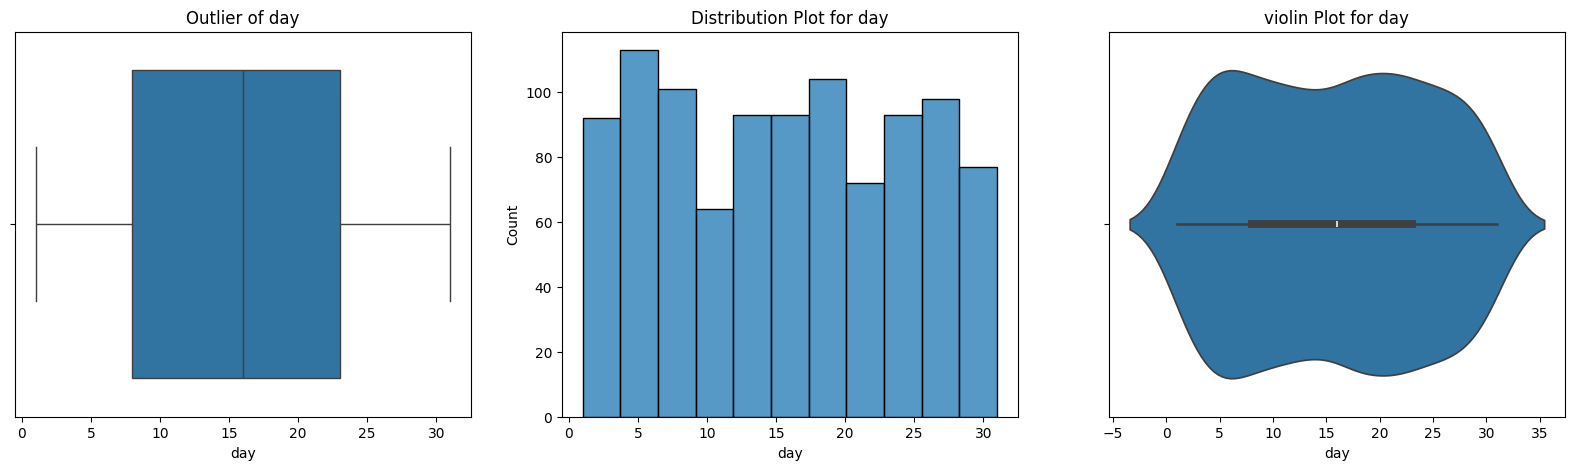

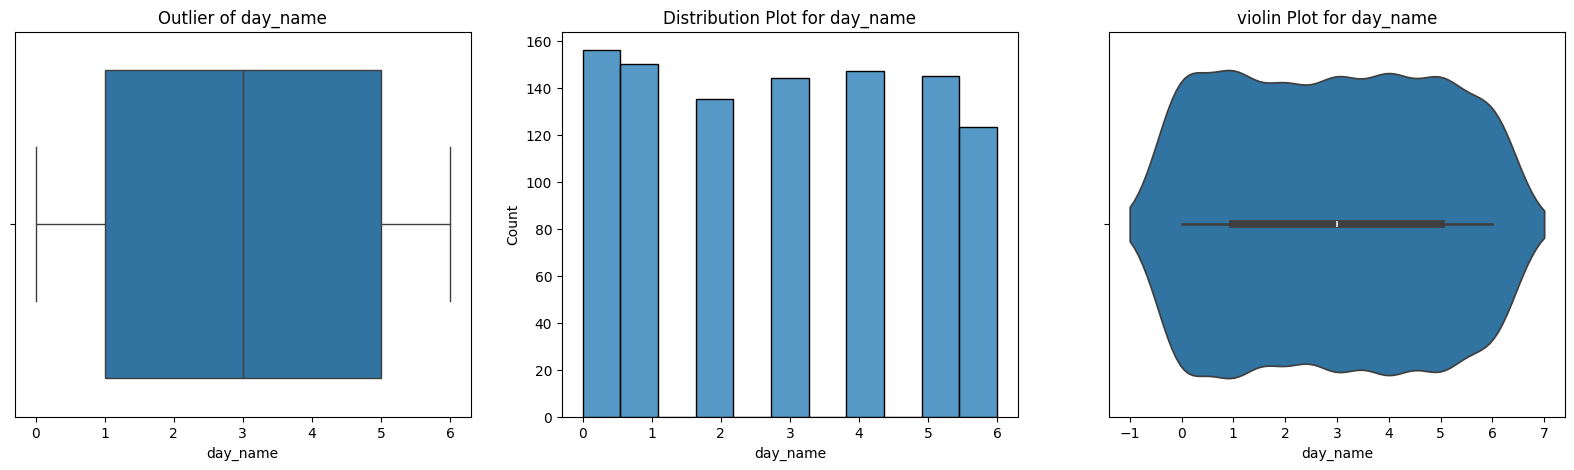

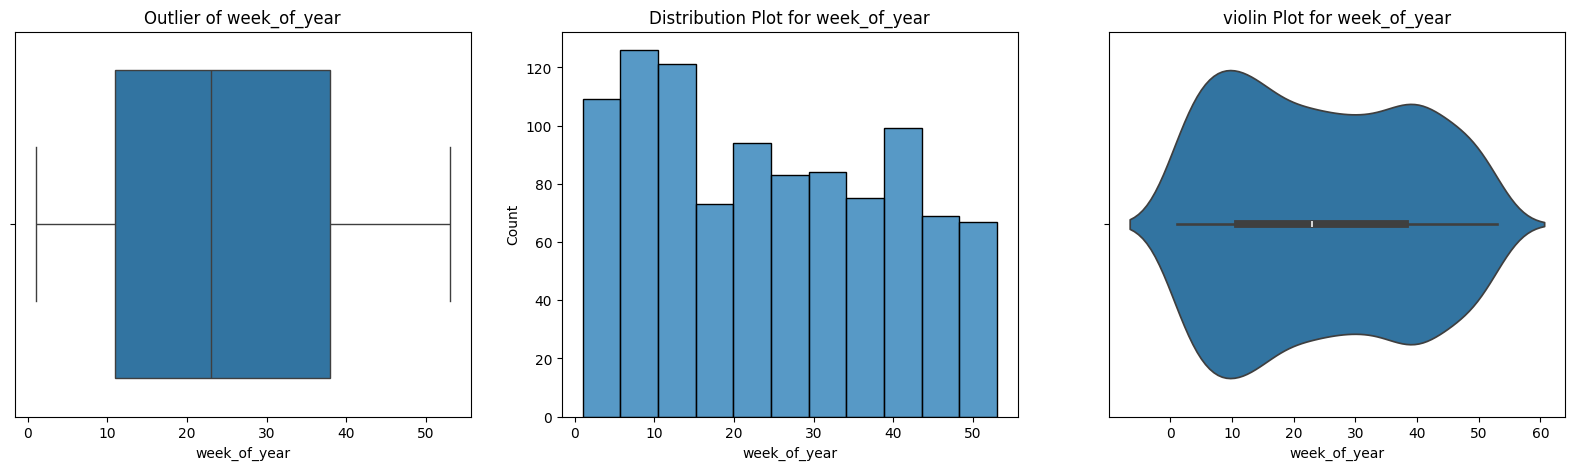

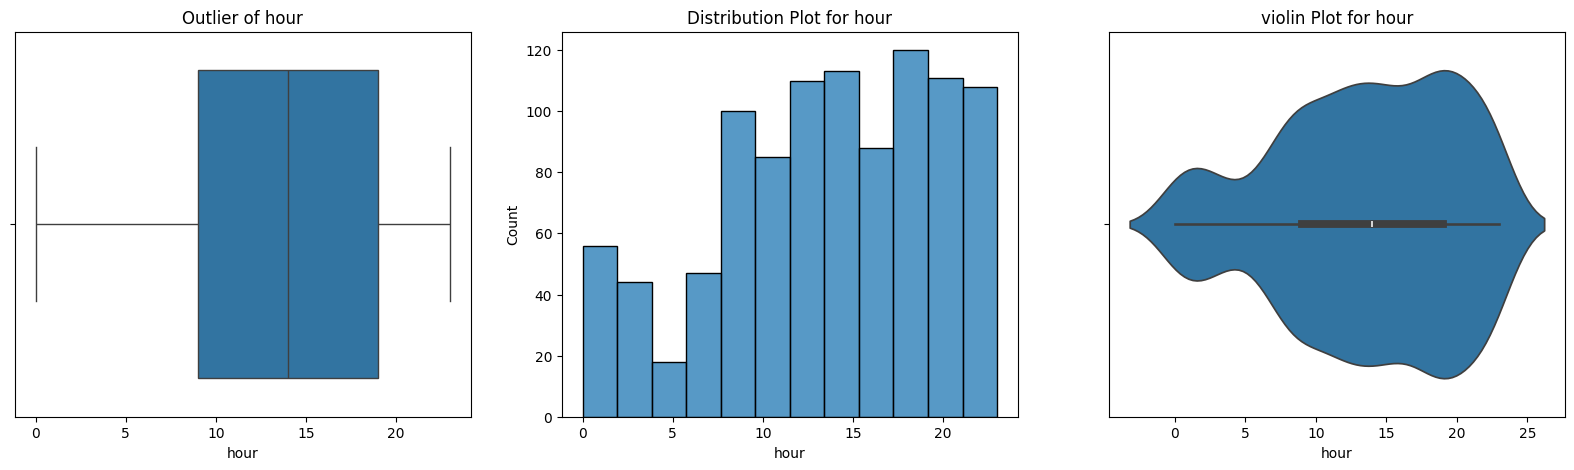

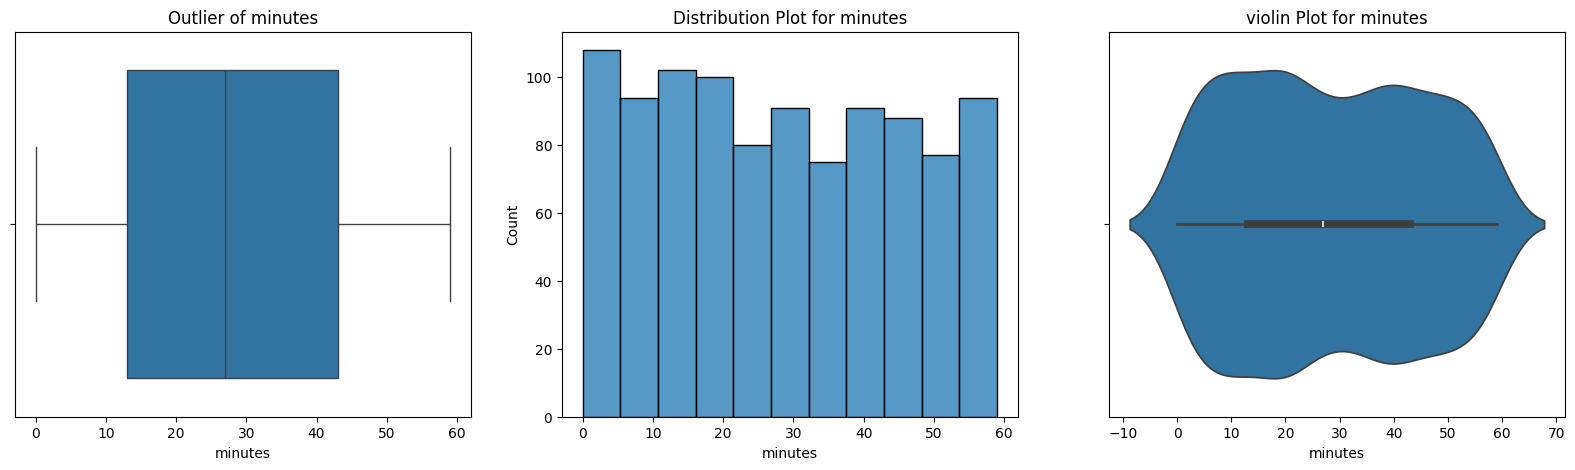

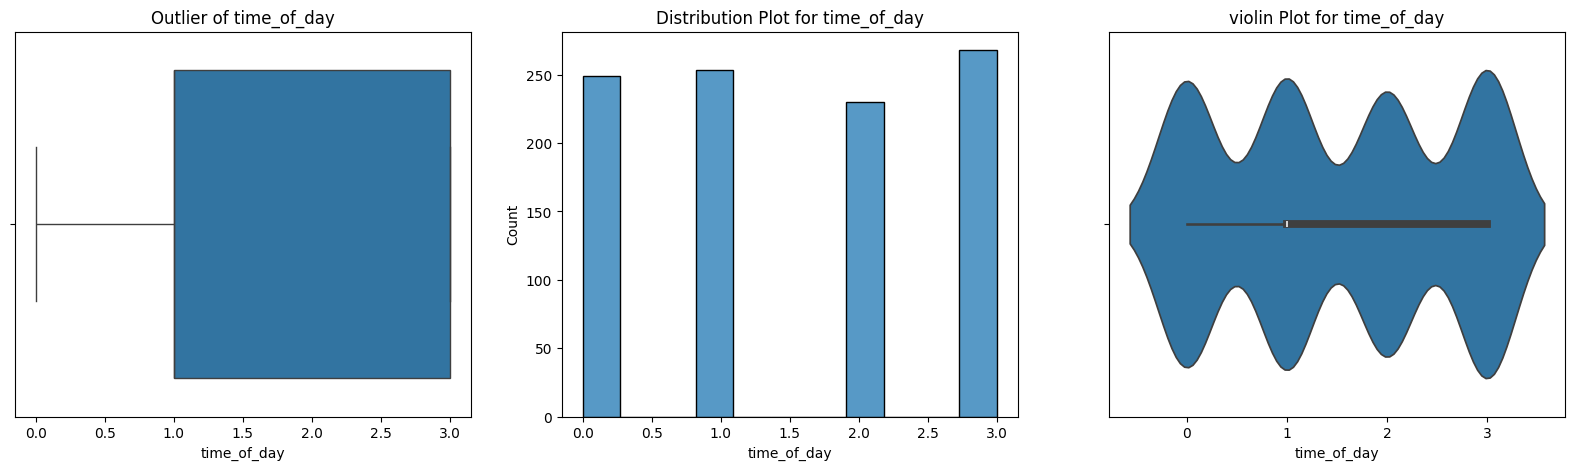

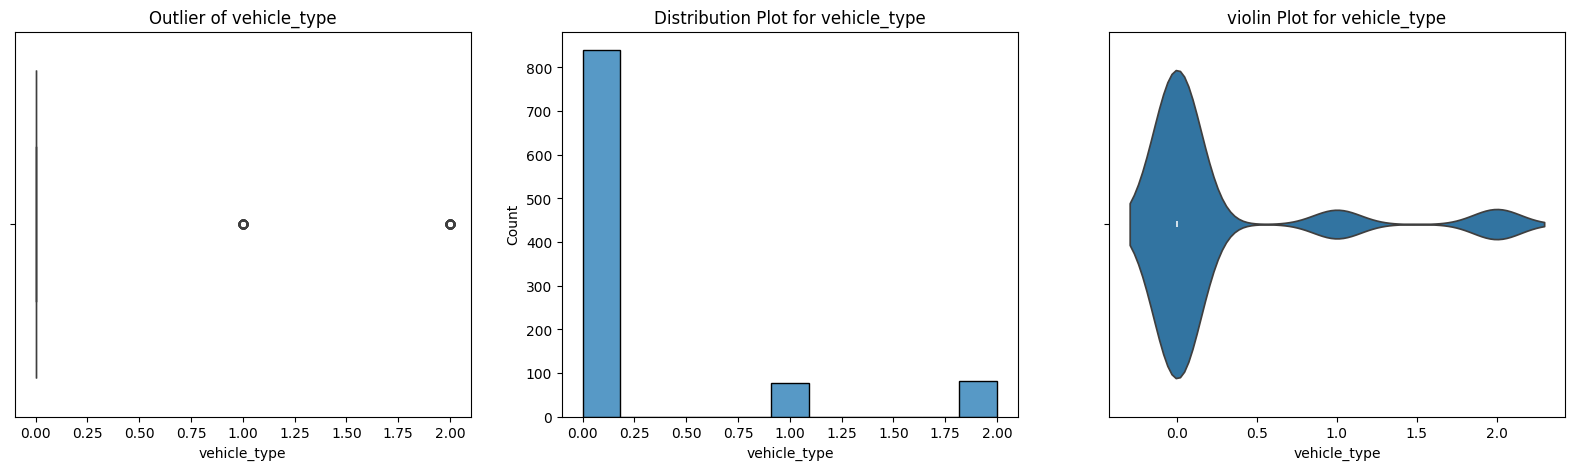

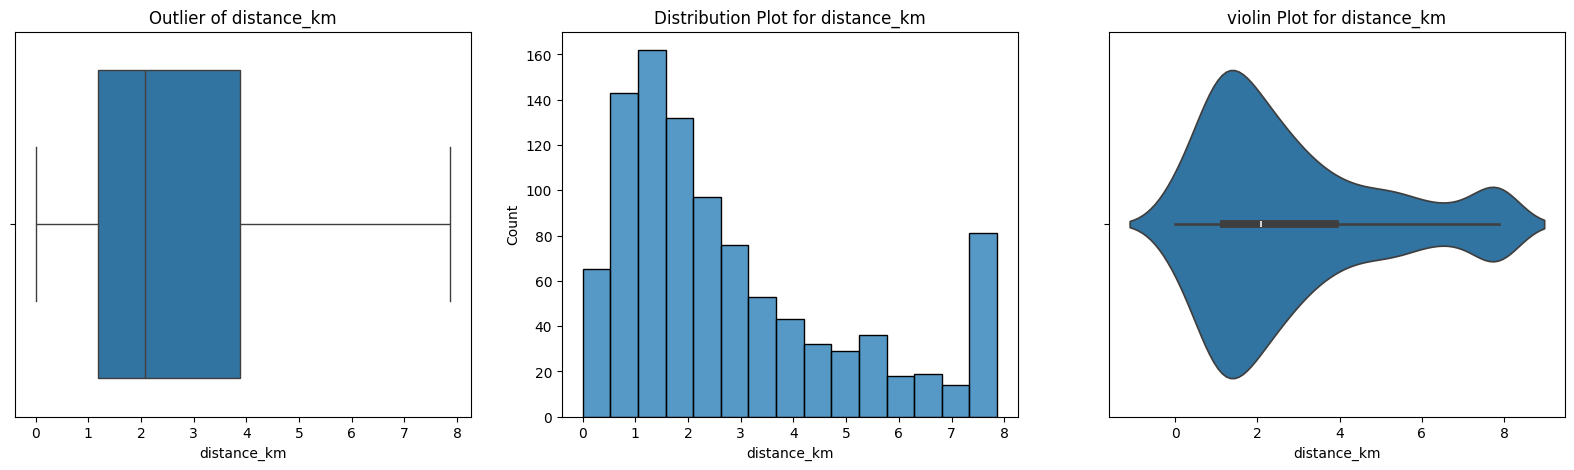

In [82]:
for i in ['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date',
       'year', 'month', 'day', 'day_name', 'week_of_year', 'hour',
       'minutes', 'time_of_day', 'vehicle_type', 'distance_km']:
    plot(df_out,i)

In [83]:
df_out['vehicle_type'].unique()

array([0, 1, 2])

# Highly correlated using Heatmap

In [84]:
import seaborn as sns

In [85]:
df_out.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date',
       'year', 'month', 'day', 'day_name', 'week_of_year', 'time', 'hour',
       'minutes', 'time_of_day', 'vehicle_type', 'distance_km'],
      dtype='object')

In [86]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  200000 non-null  float64
 4   dropoff_latitude   200000 non-null  float64
 5   passenger_count    200000 non-null  float64
 6   date               200000 non-null  object 
 7   year               200000 non-null  int32  
 8   month              200000 non-null  int32  
 9   day                200000 non-null  int32  
 10  day_name           200000 non-null  int64  
 11  week_of_year       200000 non-null  UInt32 
 12  time               200000 non-null  object 
 13  hour               200000 non-null  int32  
 14  minutes            200000 non-null  int32  
 15  time_of_day        200000 non-null  int64  
 16  ve

<Axes: >

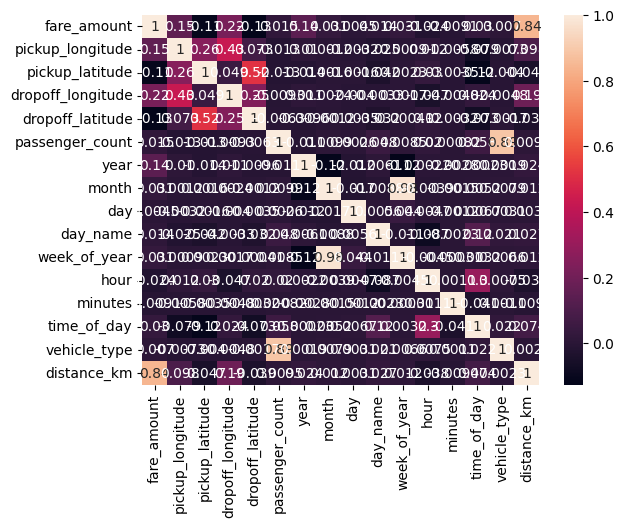

In [87]:

col = ['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 
       'year', 'month', 'day', 'day_name', 'week_of_year', 'hour',
       'minutes', 'time_of_day', 'vehicle_type', 'distance_km']
df_heatmap = df_out[col].corr()
sns.heatmap(df_heatmap, annot=True)

# Final Dataframe

In [88]:
df_final=df_out.copy()
df_final=df_final.drop(columns=['date','time'], axis=1)
df_final.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,5,7,3,19,19,52,2,0,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,7,17,4,29,20,4,2,0,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,8,24,0,35,21,45,3,0,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,6,26,4,26,8,22,0,1,1.662
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,2014,8,28,3,35,17,47,2,2,4.475


# Regression Method - Prdict Fare_amount

## Importing Libraries

In [112]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle
     

In [90]:
df_final.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,5,7,3,19,19,52,2,0,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,7,17,4,29,20,4,2,0,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,8,24,0,35,21,45,3,0,5.036


In [91]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  200000 non-null  float64
 4   dropoff_latitude   200000 non-null  float64
 5   passenger_count    200000 non-null  float64
 6   year               200000 non-null  int32  
 7   month              200000 non-null  int32  
 8   day                200000 non-null  int32  
 9   day_name           200000 non-null  int64  
 10  week_of_year       200000 non-null  UInt32 
 11  hour               200000 non-null  int32  
 12  minutes            200000 non-null  int32  
 13  time_of_day        200000 non-null  int64  
 14  vehicle_type       200000 non-null  int64  
 15  distance_km        200000 non-null  float64
dtypes:

In [92]:
df_final.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'day_name', 'week_of_year', 'hour', 'minutes',
       'time_of_day', 'vehicle_type', 'distance_km'],
      dtype='object')

## Selecting the good model

In [93]:
def machine_learning_regression(df, algorithm):

    x = df.drop(columns=['fare_amount'], axis=1)
    y = df['fare_amount']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [94]:

print(machine_learning_regression(df_final, LinearRegression))
print(machine_learning_regression(df_final, DecisionTreeRegressor))
print(machine_learning_regression(df_final, ExtraTreesRegressor))
print(machine_learning_regression(df_final, RandomForestRegressor))
print(machine_learning_regression(df_final, AdaBoostRegressor))
print(machine_learning_regression(df_final, GradientBoostingRegressor))
print(machine_learning_regression(df_final, XGBRegressor))

{'algorithm': 'LinearRegression', 'R2_train': 0.7535143159658828, 'R2_test': 0.7426313094519591}
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9999967996877831, 'R2_test': 0.5968224296892903}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999967996877831, 'R2_test': 0.7984713045665983}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9733245327547018, 'R2_test': 0.8038758915738924}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.6510047126835385, 'R2_test': 0.6478803750889952}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8001566268086151, 'R2_test': 0.7912341791966112}
{'algorithm': 'XGBRegressor', 'R2_train': 0.8580409556063343, 'R2_test': 0.8198425101718957}


{'algorithm': 'LinearRegression', 'R2_train': 0.7535143159658828, 'R2_test': 0.7426313094519591}
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9999967996877831, 'R2_test': 0.6024025108050464}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999967996877831, 'R2_test': 0.79944275221336}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9731470019322044, 'R2_test': 0.8037980295186012}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.6483693086640974, 'R2_test': 0.6454123365083224}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8001566268086151, 'R2_test': 0.7912341791966111}
{'algorithm': 'XGBRegressor', 'R2_train': 0.8580409556063343, 'R2_test': 0.8198425101718957}

# Linear regression model

In [95]:
df_final.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,5,7,3,19,19,52,2,0,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,7,17,4,29,20,4,2,0,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,8,24,0,35,21,45,3,0,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,6,26,4,26,8,22,0,1,1.662
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,2014,8,28,3,35,17,47,2,2,4.475


In [154]:
x=df_final.drop(['fare_amount'],axis=1)
y=df_final['fare_amount']

In [155]:
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,5,7,3,19,19,52,2,0,1.683
1,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,7,17,4,29,20,4,2,0,2.458
2,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,8,24,0,35,21,45,3,0,5.036
3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,6,26,4,26,8,22,0,1,1.662
4,-73.929786,40.744085,-73.973082,40.761247,3.5,2014,8,28,3,35,17,47,2,2,4.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1.0,2012,10,28,6,43,10,49,0,0,0.112
199996,-73.984722,40.736837,-74.006672,40.739620,1.0,2014,3,14,4,11,1,9,3,0,1.875
199997,-73.986017,40.756487,-73.922034,40.692588,2.0,2009,6,29,0,27,0,42,3,0,7.865
199998,-73.997124,40.725452,-73.983215,40.695415,1.0,2015,5,20,2,21,14,56,1,0,3.540


In [156]:
y

0          7.50
1          7.70
2         12.90
3          5.30
4         16.00
          ...  
199995     3.00
199996     7.50
199997    22.25
199998    14.50
199999    14.10
Name: fare_amount, Length: 200000, dtype: float64

In [157]:
x.shape,y.shape

((200000, 15), (200000,))

In [158]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [159]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [160]:
model.score(x_test,y_test)

0.7426313094519591

In [161]:
x_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
119737,-74.000458,40.723990,-73.989682,40.725797,1.0,2014,12,8,0,50,23,26,3,0,0.930
72272,-73.929786,40.686252,-73.922034,40.682556,3.5,2012,9,2,6,35,21,54,3,2,0.000
158154,-73.955315,40.779068,-73.970558,40.764650,3.5,2010,6,24,3,25,18,11,2,2,2.054
65426,-73.929786,40.773705,-73.964346,40.797100,3.0,2012,11,14,2,46,20,58,2,1,7.865
30074,-73.992195,40.748958,-73.987078,40.743065,1.0,2011,9,19,0,38,8,2,0,0,0.784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,-73.994282,40.751407,-73.999077,40.761175,1.0,2013,8,18,6,33,0,5,3,0,1.159
91537,-73.984033,40.733817,-73.982888,40.777028,1.0,2010,10,20,2,42,8,29,0,0,4.806
156449,-73.980220,40.770512,-73.984235,40.765747,2.0,2014,6,24,1,26,11,44,0,0,0.629
184376,-73.991403,40.739567,-73.987616,40.749976,1.0,2011,9,12,0,37,13,30,1,0,1.201


In [162]:
y_test

119737     5.50
72272     22.25
158154     5.30
65426     22.25
30074      4.10
          ...  
4174       6.50
91537     13.70
156449     5.50
184376     5.70
6584       6.50
Name: fare_amount, Length: 40000, dtype: float64

In [165]:
user_data = np.array([[-74.000458,40.723990,-73.989682,40.725797,1.0,2014,12,8,0,50,23,26,3,0,0.930]])
y_pred = model.predict(user_data)
y_pred[0]

c:\Users\ajay2\OneDrive\Desktop\guvi\PROJECT_CAP\Uber Fare Prediction\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(7.307969998742919)

# RandomForestRegressor

In [207]:
x = df_final.drop(columns=['fare_amount'], axis=1)
y = df_final['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

param_grid_r = {'max_depth'      : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2', None]}

grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 4,
  'min_samples_split': 2},
 np.float64(0.8104922057143371))

In [208]:
# best parameters for hypertuning the random forest algorithm for better accuracy in unseen data
grid_search_r.best_params_,grid_search_r.best_score_

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 4,
  'min_samples_split': 2},
 np.float64(0.8104922057143371))

In [209]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x = df_final.drop(columns=['fare_amount'], axis=1)
y = df_final['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9113842933835574, 0.8062140138710242)

In [211]:
# predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = df_final.drop(columns=['fare_amount'], axis=1)
y = df_final['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.8041978921953932,
 'Mean Absolute Error': np.float64(1.520686332181827),
 'Mean Squared Error': np.float64(5.822684228114617),
 'Root Mean Squared Error': np.float64(2.4130238764079017)}

In [212]:
user_data = np.array([[-73.999817,40.738354,-73.999512,40.723217,1.0,2015,5,7,3,19,19,52,2,0,1.683]])
y_pred = model.predict(user_data)
y_pred[0]

c:\Users\ajay2\OneDrive\Desktop\guvi\PROJECT_CAP\Uber Fare Prediction\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(8.010197923616975)

In [214]:
user_data = np.array([[-74.000458,40.723990,-73.989682,40.725797,1.0,2014,12,8,0,50,23,26,3,0,0.930]])
y_pred = model.predict(user_data)
y_pred[0]

c:\Users\ajay2\OneDrive\Desktop\guvi\PROJECT_CAP\Uber Fare Prediction\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(6.020120374309134)

In [217]:
user_data = np.array([[-73.984033,40.733817,-73.982888,40.777028,1.0,2010,10,20,2,42,8,29,0,0,4.806]])
y_pred = model.predict(user_data)
y_pred[0]

c:\Users\ajay2\OneDrive\Desktop\guvi\PROJECT_CAP\Uber Fare Prediction\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(13.514722286435704)

# XGBRegressor

In [174]:
import xgboost as xgb

In [175]:
x = df_final.drop(columns=['fare_amount'], axis=1)
y = df_final['fare_amount']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the XGBRegressor model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print the evaluation metrics
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R²: 0.8580
Test R²: 0.8198
Train RMSE: 2.0477
Test RMSE: 2.3146


In [176]:
model.score(x_test,y_test)

0.8198425101718957

In [177]:
x_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
119737,-74.000458,40.723990,-73.989682,40.725797,1.0,2014,12,8,0,50,23,26,3,0,0.930
72272,-73.929786,40.686252,-73.922034,40.682556,3.5,2012,9,2,6,35,21,54,3,2,0.000
158154,-73.955315,40.779068,-73.970558,40.764650,3.5,2010,6,24,3,25,18,11,2,2,2.054
65426,-73.929786,40.773705,-73.964346,40.797100,3.0,2012,11,14,2,46,20,58,2,1,7.865
30074,-73.992195,40.748958,-73.987078,40.743065,1.0,2011,9,19,0,38,8,2,0,0,0.784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,-73.994282,40.751407,-73.999077,40.761175,1.0,2013,8,18,6,33,0,5,3,0,1.159
91537,-73.984033,40.733817,-73.982888,40.777028,1.0,2010,10,20,2,42,8,29,0,0,4.806
156449,-73.980220,40.770512,-73.984235,40.765747,2.0,2014,6,24,1,26,11,44,0,0,0.629
184376,-73.991403,40.739567,-73.987616,40.749976,1.0,2011,9,12,0,37,13,30,1,0,1.201


In [178]:
y_test

119737     5.50
72272     22.25
158154     5.30
65426     22.25
30074      4.10
          ...  
4174       6.50
91537     13.70
156449     5.50
184376     5.70
6584       6.50
Name: fare_amount, Length: 40000, dtype: float64

In [179]:
user_data = np.array([[-74.000458,40.723990,-73.989682,40.725797,1.0,2014,12,8,0,50,23,26,3,0,0.930]])
y_pred = model.predict(user_data)
y_pred[0]

np.float32(5.6733866)

In [180]:
user_data = np.array([[-73.984033,40.733817,-73.982888,40.777028,1.0,2010,10,20,2,42,8,29,0,0,4.806]])
y_pred = model.predict(user_data)
y_pred[0]

np.float32(14.127498)

## Code for Hyperparameter Tuning

In [181]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [182]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert the datasets to DMatrix, a data structure that XGBoost optimizes for speed and performance
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the model with early stopping
evallist = [(dtrain, 'train'), (dtest, 'eval')]
num_boost_round = 1000  # Arbitrary large number for maximum boosting rounds
early_stopping_rounds = 10  # Stop if no improvement after 10 rounds

bst = xgb.train(params, dtrain, num_boost_round=num_boost_round, evals=evallist, 
                early_stopping_rounds=early_stopping_rounds)

# Make predictions
y_train_pred = bst.predict(dtrain)
y_test_pred = bst.predict(dtest)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


[0]	train-rmse:5.01752	eval-rmse:5.03662
[1]	train-rmse:4.65945	eval-rmse:4.68055
[2]	train-rmse:4.33808	eval-rmse:4.36040
[3]	train-rmse:4.05725	eval-rmse:4.08146
[4]	train-rmse:3.81454	eval-rmse:3.84045
[5]	train-rmse:3.61043	eval-rmse:3.63912
[6]	train-rmse:3.42887	eval-rmse:3.45981
[7]	train-rmse:3.27387	eval-rmse:3.30688
[8]	train-rmse:3.14577	eval-rmse:3.18160
[9]	train-rmse:3.03223	eval-rmse:3.07102
[10]	train-rmse:2.98265	eval-rmse:3.02225
[11]	train-rmse:2.89618	eval-rmse:2.93858
[12]	train-rmse:2.82063	eval-rmse:2.86520
[13]	train-rmse:2.75728	eval-rmse:2.80369
[14]	train-rmse:2.71831	eval-rmse:2.76612
[15]	train-rmse:2.67079	eval-rmse:2.72168
[16]	train-rmse:2.64283	eval-rmse:2.69461
[17]	train-rmse:2.60618	eval-rmse:2.65967
[18]	train-rmse:2.57670	eval-rmse:2.63214
[19]	train-rmse:2.55007	eval-rmse:2.60745
[20]	train-rmse:2.52786	eval-rmse:2.58685
[21]	train-rmse:2.50920	eval-rmse:2.56957
[22]	train-rmse:2.49282	eval-rmse:2.55497
[23]	train-rmse:2.47845	eval-rmse:2.54162
[2

In [188]:
x = df_final.drop(columns=['fare_amount'], axis=1)
y = df_final['fare_amount']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBRFRegressor(), param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

c:\Users\ajay2\OneDrive\Desktop\guvi\PROJECT_CAP\Uber Fare Prediction\.venv\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_cat_threshold=None,
                                      max_...
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=None, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]})

In [190]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [191]:
best_params

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 7,
 'n_estimators': 50,
 'subsample': 0.8}

In [192]:
best_model

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=1.0, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=50, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [193]:

# Make predictions with the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)


In [194]:
# best parameters for hypertuning the random forest algorithm for better accuracy in unseen data
grid_search.best_params_,grid_search.best_score_

({'colsample_bytree': 1.0,
  'learning_rate': 0.2,
  'max_depth': 7,
  'n_estimators': 50,
  'subsample': 0.8},
 np.float64(0.28171384342192685))

In [195]:

# Make predictions with the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Best Params: {best_params}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}
Train R²: 0.2825
Test R²: 0.2806
Train RMSE: 4.6038
Test RMSE: 4.6251


In [197]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Assuming df_final is your DataFrame and selling_price_log is the target variable

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(x)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize the XGBRegressor model with the best parameters
model = xgb.XGBRegressor(objective='reg:squarederror', 
                         colsample_bytree=1.0, 
                         learning_rate=0.2, 
                         max_depth=7, 
                         n_estimators=50, 
                         subsample=0.8, 
                         random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Train R²: 0.8535
Test R²: 0.8167
Train RMSE: 2.0806
Test RMSE: 2.3345


In [198]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Initialize the model with the best parameters
model = xgb.XGBRegressor(objective='reg:squarederror', 
                         colsample_bytree=1.0, 
                         learning_rate=0.2, 
                         max_depth=7, 
                         n_estimators=50, 
                         subsample=0.8, 
                         random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV R² Scores: {cv_scores.std():.4f}")


Cross-Validation R² Scores: [0.82008709 0.82426152 0.82378984 0.81249959 0.82603468]
Mean CV R² Score: 0.8213
Standard Deviation of CV R² Scores: 0.0048


In [201]:
df_final.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,5,7,3,19,19,52,2,0,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,7,17,4,29,20,4,2,0,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,8,24,0,35,21,45,3,0,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,6,26,4,26,8,22,0,1,1.662
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,2014,8,28,3,35,17,47,2,2,4.475


In [204]:

x = df_final.drop(columns=['fare_amount'], axis=1)
y = df_final['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


# Initialize the model with the best parameters
model = xgb.XGBRegressor(objective='reg:squarederror', 
                         colsample_bytree=1.0, 
                         learning_rate=0.2, 
                         max_depth=7, 
                         n_estimators=50, 
                         subsample=0.8, 
                         random_state=42)

model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [205]:
user_data = np.array([[-74.000458,40.723990,-73.989682,40.725797,1.0,2014,12,8,0,50,23,26,3,0,0.930]])
y_pred = model.predict(user_data)
y_pred[0]

np.float32(5.9611125)

In [206]:
user_data = np.array([[-73.984033,40.733817,-73.982888,40.777028,1.0,2010,10,20,2,42,8,29,0,0,4.806]])
y_pred = model.predict(user_data)
y_pred[0]

np.float32(13.520955)